In [2]:
import zipfile

import ast
import io
import csv
import numpy as np

import pickle
import random
import multiprocessing

import pandas as pd

import matplotlib.pyplot as plt
import math

In [3]:
items_clusters_test_dir = '../dados/precificacao/fasttext_skip100/complete/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/items_clusters_test.csv.zip'
items_clusters_test = pd.read_csv(items_clusters_test_dir,sep=';')
items_clusters_test.head(10)

,item_id,seq_dim_licitacao,outlier,cluster,cluster_prob,dsc_unidade_medida,description,areas,price,mean,median,var,std,count,max,min,quantile_1,quantile_3
0,1277795,1160908,1,-2,0.0,unidade,"['receptacao', 'louca', 'a27']",Administração | Assistência Social | Comunicaç...,2.50,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
1,1277796,1160908,1,-2,0.0,unidade,"['receptacao', 'louca', '140']",Administração | Assistência Social | Comunicaç...,8.45,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
2,94092,779930,1,-2,0.0,unidade,"['fixar', 'bomba', 'hidraulico', 'michigan', '...",Transporte,200.00,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
3,110995,785520,1,-2,0.0,unidade,"['caixa', 'plastico', 'pvc', '2', 'x', '4', 'f...",Saúde,0.33,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
4,110996,785520,1,-2,0.0,unidade,"['caixa', 'plastico', 'pvc', '4', 'x', 'fixar'...",Saúde,0.77,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
5,424559,990876,1,-2,0.0,frasco,"['fixar', 'citologico', '100', 'ml']",Saúde,5.89,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
6,111890,785778,1,-2,0.0,peca,"['mpt', '3', 'a', 'modulo', 'potencia']",Vazio,2160.00,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
7,1414122,1187635,1,-2,0.0,frasco,['escabin'],Assistência Social | Saúde,13.39,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
8,218600,860797,1,contr_-1,0.0,unidade,"['contr', 'diario', 'atendimento', 'mod', 'novo']",Administração | Saúde,8.20,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0
9,685597,1040688,1,contr_-1,0.0,sv,"['contr', 'seguro', 'contra', 'terceiro', 'hlf...",Educação | Saúde,600.00,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0


In [4]:
items_clusters_train_dir = '../dados/precificacao/fasttext_skip100/complete/baseline+embeddings/SUB+MED+unit+num_concat_umap_hdbscan_euclidean/items_clusters_train.csv.zip'

items_clusters_train = pd.read_csv(items_clusters_train_dir,sep=';')
items_clusters_train.head(10)

,item_id,seq_dim_licitacao,outlier,cluster,dsc_unidade_medida,description,original,areas,price
0,899879,874710,1,trimetoprima,s.o,mg trimetoprima 40 5 ml frasco 50 sulfametoxaz...,SULFAMETOXAZOL200 MG TRIMETROPRIMA 40 MG/5ML...,Vazio,1.40
1,3543667,1076591,1,trimetoprima,frasco,trimetoprima,TRIMETOPRIMA,Administração,8.25
2,5685964,1186568,1,trimetoprima,s.o,mg trimetoprima 40 5 ml frasco 50 sulfametoxaz...,SULFAMETOXAZOL200 MG TRIMETROPRIMA 40 MG/5ML...,Vazio,1.40
3,5815235,1192790,1,trimetoprima,comprimido,trimetoprima sulfametoxazol 400 mg 80,TRIMETOPRIMA + SULFAMETOXAZOL 400 MG + 80 MG,Saúde,0.12
4,5819991,1192860,1,trimetoprima,comprimido,trimetoprima sulfametoxazol 400 mg 80,TRIMETOPRIMA + SULFAMETOXAZOL 400 MG + 80 MG,Vazio,0.13
5,5819992,1192860,1,trimetoprima,comprimido,trimetoprima sulfametoxazol 400 mg 80,TRIMETOPRIMA + SULFAMETOXAZOL 400 MG + 80 MG,Vazio,0.11
6,5820032,1192860,1,trimetoprima,frasco,trimetoprima sulfametoxazol 400 mg 80,TRIMETOPRIMA - SULFAMETOXAZOL 400 MG - 80 MG,Vazio,1.82
7,5820033,1192860,1,trimetoprima,frasco,trimetoprima sulfametoxazol 400 mg 80,TRIMETOPRIMA - SULFAMETOXAZOL 400 MG - 80 MG,Vazio,1.37
8,404718,781542,1,recarregavel_-1,unidade,po recarregavel para impressor hp laser jet 10...,PO RECARREGAVEL PARA IMPRESSORA HP LASER JET 1...,Vazio,3.00
9,404719,781542,1,recarregavel_-1,unidade,po recarregavel para impressor hp laser jet 10...,PO RECARREGAVEL PARA IMPRESSORA HP LASER JET 1...,Vazio,3.00


In [5]:
all_clusters = items_clusters_train.cluster.unique()
first_token_clusters = set()
for c in all_clusters:
    if '_' in c:
        first_token_clusters.add(c.split("_")[0]+"_")
    else:
        first_token_clusters.add(c)
first_token_clusters=np.array(list(first_token_clusters))

In [6]:
len(first_token_clusters)

24687

In [7]:
def calc_noise_dist(p_num, range_begin, range_end, train_dict, test_dict, train_test_dict):


    count = 0
    for cluster in first_token_clusters[range_begin:range_end]:
        if count%100 ==0:
            print(p_num, count, range_end-range_begin)
        count+=1


        try:
            calc_noise = cluster[-1] == '_'
            noise_cluster = cluster+'-1'

            if calc_noise:
                qtd_elements_noise_cluster_train = items_clusters_train[items_clusters_train['cluster'] == noise_cluster].shape[0]
                qtd_elements_cluster_train = items_clusters_train[items_clusters_train['cluster'].str.contains(cluster, na=False)].shape[0]
            else:
                qtd_elements_noise_cluster_train = 0
                qtd_elements_cluster_train = items_clusters_train[items_clusters_train['cluster'] == cluster].shape[0]

            qtd_elements_non_noise_cluster_train = qtd_elements_cluster_train-qtd_elements_noise_cluster_train
            train_dict[cluster] = [cluster, qtd_elements_noise_cluster_train, qtd_elements_non_noise_cluster_train, qtd_elements_cluster_train]
            ####################################################################

            if calc_noise:
                qtd_elements_noise_cluster_test = items_clusters_test[items_clusters_test['cluster'] == noise_cluster].shape[0]
                qtd_elements_cluster_test = items_clusters_test[items_clusters_test['cluster'].str.contains(cluster, na=False)].shape[0]
            else:
                qtd_elements_noise_cluster_test = 0
                qtd_elements_cluster_test = items_clusters_test[items_clusters_test['cluster'] == cluster].shape[0]

            qtd_elements_non_noise_cluster_test = qtd_elements_cluster_test-qtd_elements_noise_cluster_test
            test_dict[cluster]=[cluster, qtd_elements_noise_cluster_test, qtd_elements_non_noise_cluster_test, qtd_elements_cluster_test]


            qtd_elements_noise_cluster = qtd_elements_noise_cluster_train + qtd_elements_noise_cluster_test
            qtd_elements_non_noise_cluster = qtd_elements_non_noise_cluster_train + qtd_elements_non_noise_cluster_test
            qtd_elements_cluster= qtd_elements_cluster_train + qtd_elements_cluster_test
            train_test_dict[cluster]=[cluster, qtd_elements_noise_cluster, qtd_elements_non_noise_cluster, qtd_elements_cluster]

        except:
            print("Something went wrong",cluster)




In [8]:
def get_ranges(num_jobs):
    len_first_token_clusters = len(first_token_clusters)
    len_elements = math.floor(len_first_token_clusters/(num_jobs-1))
    ranges = []
    for i in range(num_jobs):
        if (len_elements*i+len_elements) > len_first_token_clusters:
            ranges.append([i,len_elements*i, len_first_token_clusters])
        else:
            ranges.append([i,len_elements*i, len_elements*i+len_elements])
            
    return ranges

In [9]:
get_ranges(25)

[[0, 0, 1028],
 [1, 1028, 2056],
 [2, 2056, 3084],
 [3, 3084, 4112],
 [4, 4112, 5140],
 [5, 5140, 6168],
 [6, 6168, 7196],
 [7, 7196, 8224],
 [8, 8224, 9252],
 [9, 9252, 10280],
 [10, 10280, 11308],
 [11, 11308, 12336],
 [12, 12336, 13364],
 [13, 13364, 14392],
 [14, 14392, 15420],
 [15, 15420, 16448],
 [16, 16448, 17476],
 [17, 17476, 18504],
 [18, 18504, 19532],
 [19, 19532, 20560],
 [20, 20560, 21588],
 [21, 21588, 22616],
 [22, 22616, 23644],
 [23, 23644, 24672],
 [24, 24672, 24687]]

In [10]:
manager_train = multiprocessing.Manager()
manager_test = multiprocessing.Manager()
manager_train_test = multiprocessing.Manager()

manager_train_dict = manager_train.dict()
manager_test_dict = manager_test.dict()
manager_train_test_dict = manager_train_test.dict()

jobs = []
num_jobs = 25


ranges = get_ranges(num_jobs)

for p, r_begin, r_end in ranges:
    p = multiprocessing.Process(target=calc_noise_dist, args = [p, r_begin, r_end, manager_train_dict, manager_test_dict, manager_train_test_dict])
    jobs.append(p)
    p.start()

for proc in jobs:
    proc.join()

0 01  10280 
2 10280
 3 10280
 41028 
05  10280
 61028 
07  10280
 81028 0
 91028 
0 102810
 0 111028 
0 121028 
0 131028 
0 141028 
0 151028 
016  1028017
  10280 1028

18 019 1028 0 
102820 
210  221028 00 
102823
 1028 0
 1028
24 0 15
13 100 1028
3 100 1028
12 100 1028
10 100 1028
17 100 1028
2 100 1028
11 100 1028
23 100 1028
14 100 1028
20 100 1028
4 100 1028
7 100 1028
16 100 1028
19 100 1028
18 100 1028
8 100 1028
6 100 1028
1 100 1028
21 100 1028
5 100 1028
22 100 1028
15 100 1028
9 100 1028
0 100 1028
10 200 1028
11 200 1028
17 200 1028
16 200 1028
7 200 1028
3 200 1028
12 200 1028
20 200 1028
5 200 1028
2 200 1028
22 200 1028
4 200 1028
13 200 1028
9 200 1028
23 200 1028
8 200 1028
6 200 1028
15 200 1028
21 200 1028
18 200 1028
14 200 1028
1 200 1028
19 200 1028
0 200 1028
10 300 1028
2 300 1028
6 300 1028
20 300 1028
11 300 1028
8 300 1028
14 300 1028
17 300 1028
13 300 1028
7 300 1028
12 300 1028
5 300 1028
16 300 1028
4 300 1028
22 300 1028
23 300 1028
15 300 1028
3 300 10

In [11]:
for k in manager_train_dict.keys():
    print('train',manager_train_dict[k])

for k in manager_test_dict.keys():
    print('test',manager_test_dict[k])

for k in manager_train_test_dict.keys():
    print('train_test',manager_train_test_dict[k])

train ['saccharomycereviase', 0, 2, 2]
train ['haver', 0, 9, 9]
train ['educacaotransporte', 0, 1, 1]
train ['descolamento', 0, 1, 1]
train ['fipronil', 0, 10, 10]
train ['bottom', 0, 1, 1]
train ['lavabo', 0, 14, 14]
train ['macaportatil', 0, 2, 2]
train ['liposic', 0, 2, 2]
train ['rabela', 0, 3, 3]
train ['autorizar', 0, 3, 3]
train ['globopar', 0, 2, 2]
train ['pessos', 0, 1, 1]
train ['igitur', 0, 8, 8]
train ['genet', 0, 2, 2]
train ['rolante', 0, 3, 3]
train ['dessitalacao', 0, 2, 2]
train ['rbc', 0, 1, 1]
train ['trey', 0, 1, 1]
train ['ajax', 0, 5, 5]
train ['paramonoclofenol', 0, 20, 20]
train ['tamsulon', 0, 4, 4]
train ['lagamar', 0, 1, 1]
train ['sunitinibe', 0, 10, 10]
train ['carotida', 0, 1, 1]
train ['item1419', 0, 2, 2]
train ['biomassa', 0, 2, 2]
train ['geotextil', 0, 1, 1]
train ['polaco', 0, 18, 18]
train ['barreirinho', 0, 1, 1]
train ['despacilin', 0, 2, 2]
train ['bereta', 0, 2, 2]
train ['fracionado', 0, 11, 11]
train ['bling', 0, 1, 1]
train ['profesor', 0, 1

train ['certficado', 0, 4, 4]
train ['alviao_', 46, 0, 46]
train ['cistina', 0, 22, 22]
train ['comunidade_', 62, 0, 62]
train ['ascaridil', 0, 3, 3]
train ['uit', 0, 1, 1]
train ['internacao_', 54, 0, 54]
train ['fotocelular', 0, 10, 10]
train ['senil', 0, 2, 2]
train ['revistinha', 0, 4, 4]
train ['item561', 0, 2, 2]
train ['xexeu', 0, 1, 1]
train ['deveron', 0, 1, 1]
train ['cesta_', 54, 1739, 1793]
train ['colarinho', 0, 3, 3]
train ['mi', 0, 5, 5]
train ['compasso_', 48, 371, 419]
train ['fasagem', 0, 2, 2]
train ['multiestatal', 0, 1, 1]
train ['descascador_', 2, 248, 250]
train ['fotopolimeri', 0, 2, 2]
train ['votante', 0, 1, 1]
train ['androcles', 0, 5, 5]
train ['passeio_', 0, 130, 130]
train ['alfaalglicosidase', 0, 1, 1]
train ['lanier', 0, 1, 1]
train ['cromado', 0, 22, 22]
train ['estoria', 0, 1, 1]
train ['sev', 0, 5, 5]
train ['hcf', 0, 1, 1]
train ['bulir_', 101, 0, 101]
train ['item185', 0, 2, 2]
train ['beterraba_', 77, 2372, 2449]
train ['pergamanato', 0, 3, 3]
trai

train ['abater_', 42, 0, 42]
train ['gerbera', 0, 9, 9]
train ['arquimedes', 0, 3, 3]
train ['prefeiturarecarga', 0, 6, 6]
train ['outboard', 0, 1, 1]
train ['escapula_', 35, 0, 35]
train ['esgosto_', 41, 0, 41]
train ['chapao', 0, 3, 3]
train ['manteigueiro', 0, 8, 8]
train ['rodapa', 0, 6, 6]
train ['lacrilax', 0, 1, 1]
train ['termomagn', 0, 21, 21]
train ['despachante', 0, 12, 12]
train ['plastia', 0, 1, 1]
train ['cobrar', 0, 3, 3]
train ['varicell', 0, 3, 3]
train ['norton', 0, 3, 3]
train ['angiografia', 0, 5, 5]
train ['linopolis', 0, 1, 1]
train ['balsamo', 0, 10, 10]
train ['boiatorneira', 0, 1, 1]
train ['polar', 0, 1, 1]
train ['adubacao', 0, 2, 2]
train ['di', 0, 21, 21]
train ['sandow', 0, 3, 3]
train ['locao_', 6, 260, 266]
train ['suxametonio_', 0, 204, 204]
train ['banqueta_', 0, 261, 261]
train ['perna', 0, 17, 17]
train ['armazenamento', 0, 25, 25]
train ['marmita_', 3, 214, 217]
train ['bagageiro', 0, 14, 14]
train ['catalogar', 0, 1, 1]
train ['advantage', 0, 2, 2]

train ['seguroveiculo', 0, 1, 1]
train ['tratar', 0, 2, 2]
train ['falange', 0, 11, 11]
train ['pinazan', 0, 1, 1]
train ['agm', 0, 7, 7]
train ['cruzetas_', 1, 120, 121]
train ['mole', 0, 7, 7]
train ['machaerium', 0, 2, 2]
train ['optaflan', 0, 1, 1]
train ['cluster', 0, 25, 25]
train ['esculpir', 0, 3, 3]
train ['lopid', 0, 3, 3]
train ['lihong', 0, 1, 1]
train ['stare', 0, 1, 1]
train ['encapado', 0, 1, 1]
train ['funcao', 0, 5, 5]
train ['elevadosestrutura', 0, 1, 1]
train ['exercicio', 0, 12, 12]
train ['silybummarianum', 0, 1, 1]
train ['c100', 0, 1, 1]
train ['selenia', 0, 10, 10]
train ['ficheiro', 0, 1, 1]
train ['angipress', 0, 23, 23]
train ['schon', 0, 4, 4]
train ['pico', 0, 5, 5]
train ['espelho_', 271, 4172, 4443]
train ['bonagran', 0, 2, 2]
train ['inverno', 0, 7, 7]
train ['aroeira', 0, 9, 9]
train ['pndc', 0, 12, 12]
train ['losartanapotassica', 0, 2, 2]
train ['definitive', 0, 1, 1]
train ['aa', 0, 11, 11]
train ['sempra', 0, 2, 2]
train ['lipase_', 165, 0, 165]
tra

train ['troponina_', 8, 149, 157]
train ['nefropielostomia', 0, 1, 1]
train ['ambrol', 0, 13, 13]
train ['hyperium', 0, 3, 3]
train ['bromazepam_', 25, 1216, 1241]
train ['pior', 0, 7, 7]
train ['ericeirabomirarboa', 0, 1, 1]
train ['fotopilimerizavel', 0, 3, 3]
train ['fliperama', 0, 1, 1]
train ['scapescope', 0, 1, 1]
train ['pantogar', 0, 23, 23]
train ['minis', 0, 5, 5]
train ['testar', 0, 19, 19]
train ['silica', 0, 9, 9]
train ['item777', 0, 1, 1]
train ['octognal', 0, 1, 1]
train ['biodisel', 0, 3, 3]
train ['profenid_', 61, 0, 61]
train ['npk', 0, 3, 3]
train ['colchis', 0, 2, 2]
train ['vitrofill', 0, 3, 3]
train ['biblico', 0, 12, 12]
train ['apc', 0, 8, 8]
train ['monet', 0, 24, 24]
train ['born', 0, 2, 2]
train ['cardapio', 0, 15, 15]
train ['joe', 0, 2, 2]
train ['eco', 0, 23, 23]
train ['candigran', 0, 4, 4]
train ['pinhal', 0, 1, 1]
train ['cortril', 0, 3, 3]
train ['ampicilab', 0, 6, 6]
train ['brezil', 0, 9, 9]
train ['digital', 0, 4, 4]
train ['casco', 0, 13, 13]
trai

train ['nectandra', 0, 2, 2]
train ['nta', 0, 2, 2]
train ['vinganca', 0, 1, 1]
train ['retentor103085', 0, 2, 2]
train ['ascorbico', 0, 2, 2]
train ['lacrifilm_', 44, 0, 44]
train ['transgeometrica', 0, 1, 1]
train ['dipositivo', 0, 1, 1]
train ['robinson', 0, 2, 2]
train ['etileno', 0, 9, 9]
train ['vitacid', 0, 2, 2]
train ['locador', 0, 4, 4]
train ['pepel', 0, 16, 16]
train ['negrine', 0, 4, 4]
train ['melolinsmith', 0, 1, 1]
train ['schistosoma', 0, 1, 1]
train ['macacao_', 15, 571, 586]
train ['amnioscopio', 0, 2, 2]
train ['papiro', 0, 1, 1]
train ['fecha', 0, 3, 3]
train ['surdinho', 0, 11, 11]
train ['providenciar', 0, 4, 4]
train ['item1137', 0, 2, 2]
train ['padraokit', 0, 2, 2]
train ['teen', 0, 3, 3]
train ['vitrine', 0, 1, 1]
train ['iodosrb', 0, 1, 1]
train ['propil', 0, 5, 5]
train ['obter_', 40, 0, 40]
train ['item1541', 0, 2, 2]
train ['rep_', 63, 539, 602]
train ['paramonoclorofen', 0, 1, 1]
train ['cm30', 0, 4, 4]
train ['canario', 0, 2, 2]
train ['item239', 0, 2, 

train ['menelat', 0, 6, 6]
train ['caulim', 0, 6, 6]
train ['ifosfamida', 0, 16, 16]
train ['sanner', 0, 1, 1]
train ['floculantes', 0, 5, 5]
train ['trissoralem', 0, 2, 2]
train ['confeccionados', 0, 1, 1]
train ['agradado', 0, 12, 12]
train ['atemoia', 0, 4, 4]
train ['arrancador', 0, 10, 10]
train ['famotidina', 0, 18, 18]
train ['rak', 0, 1, 1]
train ['bonfinopolis', 0, 3, 3]
train ['reversivel', 0, 1, 1]
train ['det', 0, 24, 24]
train ['pelucia', 0, 4, 4]
train ['embolar', 0, 2, 2]
train ['friso_', 0, 121, 121]
train ['balaclava', 0, 2, 2]
train ['bamm', 0, 6, 6]
train ['raer_', 52, 0, 52]
train ['dizermais', 0, 4, 4]
train ['spring', 0, 1, 1]
train ['palma', 0, 6, 6]
train ['catterpiller', 0, 1, 1]
train ['ultrafer', 0, 2, 2]
train ['artico_', 92, 0, 92]
train ['hemosul', 0, 2, 2]
train ['exemplar', 0, 19, 19]
train ['pinguim', 0, 12, 12]
train ['will', 0, 1, 1]
train ['bifar', 0, 1, 1]
train ['alamanda_', 39, 0, 39]
train ['arsenico', 0, 1, 1]
train ['danone', 0, 8, 8]
train ['i

train ['rifocort', 0, 2, 2]
train ['item715', 0, 2, 2]
train ['fae', 0, 2, 2]
train ['vedadores_', 39, 0, 39]
train ['cecil', 0, 7, 7]
train ['hub_', 8, 318, 326]
train ['entoado', 0, 4, 4]
train ['tensao', 0, 3, 3]
train ['picloram', 0, 1, 1]
train ['boti', 0, 1, 1]
train ['item1303', 0, 2, 2]
train ['alveolotomoluer', 0, 1, 1]
train ['pintopolis', 0, 1, 1]
train ['temporario', 0, 2, 2]
train ['descartavelesteril', 0, 2, 2]
train ['coloridoacrilico', 0, 1, 1]
train ['clareamento', 0, 1, 1]
train ['dhl', 0, 15, 15]
train ['tel', 0, 6, 6]
train ['xalacom', 0, 9, 9]
train ['leitenutren', 0, 3, 3]
train ['admissao', 0, 28, 28]
train ['toldo22742', 0, 2, 2]
train ['reseda_', 37, 0, 37]
train ['psicopedagogo', 0, 1, 1]
train ['recorte', 0, 19, 19]
train ['hydra', 0, 2, 2]
train ['miragem', 0, 16, 16]
train ['cimentovedacao', 0, 3, 3]
train ['luneta', 0, 3, 3]
train ['doceiro', 0, 1, 1]
train ['pollyanna', 0, 5, 5]
train ['refilar', 0, 12, 12]
train ['tora_', 50, 0, 50]
train ['novelo_', 34,

train ['blindex', 0, 26, 26]
train ['tylaflex', 0, 1, 1]
train ['pirotecnico', 0, 10, 10]
train ['mau', 0, 4, 4]
train ['fotopolinizador', 0, 1, 1]
train ['oculo_', 191, 4033, 4224]
train ['cordoalhocordoalho', 0, 1, 1]
train ['tede', 0, 2, 2]
train ['biodegradavel_', 37, 0, 37]
train ['detalhamento', 0, 2, 2]
train ['pregonimn', 0, 2, 2]
train ['assacar', 0, 2, 2]
train ['hydronorth', 0, 2, 2]
train ['item159', 0, 2, 2]
train ['impulsor_', 76, 873, 949]
train ['desformar', 0, 13, 13]
train ['peti', 0, 3, 3]
train ['pasonibus', 0, 2, 2]
train ['aladdin', 0, 1, 1]
train ['sonorizacaosistema', 0, 1, 1]
train ['costa', 0, 4, 4]
train ['gerilon', 0, 1, 1]
train ['homenagem', 0, 1, 1]
train ['revolucao', 0, 2, 2]
train ['brim_', 1, 216, 217]
train ['co', 0, 23, 23]
train ['jaco', 0, 9, 9]
train ['hrs', 0, 2, 2]
train ['bromato', 0, 8, 8]
train ['item1439', 0, 2, 2]
train ['eletroeletronico', 0, 3, 3]
train ['pai', 0, 3, 3]
train ['mercaptopurina', 0, 6, 6]
train ['convit', 0, 3, 3]
train ['

train ['acetil', 0, 1, 1]
train ['hqi', 0, 2, 2]
train ['ondrasetona', 0, 4, 4]
train ['prisioneiro_', 20, 533, 553]
train ['mancebo', 0, 3, 3]
train ['lidi', 0, 1, 1]
train ['desinfectante_', 58, 0, 58]
train ['revisor', 0, 1, 1]
train ['umededesedor', 0, 4, 4]
train ['tubeira', 0, 3, 3]
train ['scalp_', 212, 4973, 5185]
train ['thermaltake', 0, 1, 1]
train ['abacaxi_', 212, 2229, 2441]
train ['ova', 0, 1, 1]
train ['autor', 0, 21, 21]
train ['laticinio', 0, 1, 1]
train ['manhao_', 33, 0, 33]
train ['quelatos', 0, 3, 3]
train ['endofrost', 0, 4, 4]
train ['otoscopiobateria', 0, 2, 2]
train ['suporteeee', 0, 1, 1]
train ['ode', 0, 1, 1]
train ['capitropil', 0, 1, 1]
train ['quiabofruto', 0, 1, 1]
train ['martelo_', 153, 2899, 3052]
train ['doleo', 0, 1, 1]
train ['amadeirar', 0, 19, 19]
train ['alar', 0, 17, 17]
train ['cubeta_', 0, 215, 215]
train ['gh', 0, 17, 17]
train ['sineta', 0, 2, 2]
train ['voley', 0, 2, 2]
train ['mometasona', 0, 23, 23]
train ['polyepoxi', 0, 4, 4]
train ['e

train ['eletrovent', 0, 4, 4]
train ['purific', 0, 26, 26]
train ['astico', 0, 6, 6]
train ['dinitrato_', 0, 287, 287]
train ['docusato', 0, 4, 4]
train ['imiquimod', 0, 2, 2]
train ['bandejaplastico', 0, 1, 1]
train ['azopt_', 34, 0, 34]
train ['pochete', 0, 8, 8]
train ['fotocolorimetro', 0, 9, 9]
train ['floratil_', 70, 0, 70]
train ['aga', 0, 2, 2]
train ['correira_', 38, 0, 38]
train ['estilo', 0, 19, 19]
train ['turna', 0, 2, 2]
train ['item1334', 0, 3, 3]
train ['fornecimento_', 870, 3555, 4425]
train ['item1011', 0, 1, 1]
train ['giemsa_', 56, 0, 56]
train ['surf_', 64, 0, 64]
train ['item1574', 0, 1, 1]
train ['luvs', 0, 4, 4]
train ['provive', 0, 2, 2]
train ['frutose', 0, 16, 16]
train ['amancinha', 0, 9, 9]
train ['paratormonio_', 56, 0, 56]
train ['paracoccidioides', 0, 2, 2]
train ['gabinetegasolina', 0, 1, 1]
train ['tec', 0, 17, 17]
train ['autocopiativo', 0, 11, 11]
train ['lnbf_', 31, 0, 31]
train ['novolin', 0, 1, 1]
train ['aditivo_', 338, 2884, 3222]
train ['freudi

train ['lam', 0, 7, 7]
train ['calcareadeira', 0, 2, 2]
train ['losartana_', 22, 2167, 2189]
train ['item208', 0, 1, 1]
train ['conduites_', 33, 0, 33]
train ['visitador', 0, 2, 2]
train ['velocipede', 0, 2, 2]
train ['bambuterol', 0, 6, 6]
train ['lapatinibe', 0, 1, 1]
train ['ecosport', 0, 2, 2]
train ['lexapro', 0, 24, 24]
train ['ganchinho', 0, 4, 4]
train ['entrada_', 76, 0, 76]
train ['emedar', 0, 3, 3]
train ['postagem', 0, 1, 1]
train ['carolina', 0, 11, 11]
train ['catao', 0, 4, 4]
train ['ional', 0, 6, 6]
train ['pandano', 0, 5, 5]
train ['impact', 0, 27, 27]
train ['efrinalin', 0, 1, 1]
train ['fuscina', 0, 9, 9]
train ['tween', 0, 11, 11]
train ['corebiopsy', 0, 1, 1]
train ['bronzinamancal', 0, 10, 10]
train ['desinsetizacao', 0, 30, 30]
train ['item721', 0, 2, 2]
train ['germekil', 0, 11, 11]
train ['etonogestrel', 0, 3, 3]
train ['brasiliae', 0, 3, 3]
train ['constru', 0, 6, 6]
train ['vasada', 0, 3, 3]
train ['spandex', 0, 10, 10]
train ['tuberculina_', 47, 0, 47]
train

train ['granola_', 109, 0, 109]
train ['remar_', 30, 112, 142]
train ['elasteque', 0, 8, 8]
train ['pediassure', 0, 15, 15]
train ['captador', 0, 2, 2]
train ['enterfiber', 0, 4, 4]
train ['ooforectomia', 0, 1, 1]
train ['microaspersor', 0, 6, 6]
train ['bordetella', 0, 4, 4]
train ['ane', 0, 6, 6]
train ['telefoto', 0, 1, 1]
train ['aluviao', 0, 1, 1]
train ['nicho_', 34, 0, 34]
train ['usp', 0, 2, 2]
train ['brilhante', 0, 28, 28]
train ['aglucose', 0, 16, 16]
train ['teclado_', 47, 2339, 2386]
train ['drospirenona', 0, 16, 16]
train ['acafrao_', 18, 407, 425]
train ['cosim', 0, 1, 1]
train ['inauguracao', 0, 4, 4]
train ['graduador', 0, 3, 3]
train ['valcyte', 0, 2, 2]
train ['cruzar_', 33, 0, 33]
train ['fran', 0, 2, 2]
train ['carbonatocalcio', 0, 1, 1]
train ['franquia_', 25, 190, 215]
train ['velario', 0, 1, 1]
train ['deflazacorte_', 132, 0, 132]
train ['dataflex', 0, 14, 14]
train ['em23', 0, 1, 1]
train ['adicional', 0, 12, 12]
train ['inspetor', 0, 1, 1]
train ['aas_', 282, 

train ['formico', 0, 14, 14]
train ['sporte', 0, 3, 3]
train ['osmolalidade', 0, 6, 6]
train ['maceta', 0, 2, 2]
train ['disjuntuntor', 0, 2, 2]
train ['unidade unidade', 0, 2, 2]
train ['colocan', 0, 2, 2]
train ['ivor_', 30, 212, 242]
train ['cronobe', 0, 6, 6]
train ['flextoss', 0, 7, 7]
train ['aspargo', 0, 6, 6]
train ['sobrelencol', 0, 2, 2]
train ['pieta', 0, 2, 2]
train ['oximetazolina', 0, 8, 8]
train ['touquinha', 0, 19, 19]
train ['cast', 0, 6, 6]
train ['tinga', 0, 1, 1]
train ['licao', 0, 8, 8]
train ['antitoxico', 0, 5, 5]
train ['embreagem6412', 0, 2, 2]
train ['falda', 0, 1, 1]
train ['cel', 0, 11, 11]
train ['imipenem_', 59, 0, 59]
train ['cebolina', 0, 1, 1]
train ['estetizacao', 0, 7, 7]
train ['festival', 0, 4, 4]
train ['ficap', 0, 1, 1]
train ['hydro_', 60, 0, 60]
train ['centraleletronica', 0, 1, 1]
train ['tavares', 0, 2, 2]
train ['nasalfree', 0, 1, 1]
train ['consumidor', 0, 4, 4]
train ['tomatao', 0, 1, 1]
train ['cofa', 0, 4, 4]
train ['saladeira_', 52, 0, 5

train ['garfo_', 452, 5856, 6308]
train ['inj', 0, 1, 1]
train ['elaborar', 0, 7, 7]
train ['fh', 0, 1, 1]
train ['monoteista', 0, 2, 2]
train ['arrastador_', 0, 105, 105]
train ['assis', 0, 3, 3]
train ['grante', 0, 12, 12]
train ['uretrotomia', 0, 2, 2]
train ['moreia_', 55, 0, 55]
train ['tamoxifeno_', 68, 0, 68]
train ['piscina_', 12, 230, 242]
train ['promensil', 0, 10, 10]
train ['frees', 0, 1, 1]
train ['almotolia_', 82, 4511, 4593]
train ['doxiciclina_', 118, 0, 118]
train ['amante', 0, 7, 7]
train ['paea', 0, 1, 1]
train ['colhedor_', 56, 0, 56]
train ['profissional_', 11, 205, 216]
train ['doxazosina_', 25, 492, 517]
train ['filgrastine', 0, 1, 1]
train ['clobazona', 0, 2, 2]
train ['individual', 0, 25, 25]
train ['moby', 0, 4, 4]
train ['funcional', 0, 11, 11]
train ['dilatacao', 0, 2, 2]
train ['arado_', 95, 254, 349]
train ['monofilamento_', 20, 275, 295]
train ['insertar_', 37, 135, 172]
train ['beclodipropionato', 0, 4, 4]
train ['coltrax', 0, 19, 19]
train ['caetite', 0

train ['motoniveladorapatrol', 0, 1, 1]
train ['walden', 0, 1, 1]
train ['stande', 0, 5, 5]
train ['tirofibana', 0, 3, 3]
train ['desencapar', 0, 9, 9]
train ['chupeta_', 30, 185, 215]
train ['sorologia_', 47, 0, 47]
train ['gms', 0, 2, 2]
train ['links_', 57, 0, 57]
train ['nur', 0, 4, 4]
train ['bioquimico_', 1, 161, 162]
train ['bl_', 1, 317, 318]
train ['noz_', 0, 107, 107]
train ['permetrina_', 10, 636, 646]
train ['passagem_', 45, 1865, 1910]
train ['betametasona_', 19, 406, 425]
train ['baiano_', 82, 0, 82]
train ['protecao_', 17, 525, 542]
train ['papel_', 8246, 78418, 86664]
train ['cinetico', 0, 3, 3]
train ['rr', 0, 21, 21]
train ['tambor_', 499, 6225, 6724]
train ['cureta_', 205, 4659, 4864]
train ['duloren', 0, 1, 1]
train ['transport', 0, 10, 10]
train ['dia_', 92, 484, 576]
train ['ditiliazem', 0, 3, 3]
train ['paranomocloranfenol', 0, 1, 1]
train ['provisorio', 0, 6, 6]
train ['texturizados', 0, 1, 1]
train ['ipaseal', 0, 2, 2]
train ['seda_', 124, 37, 161]
train ['nord

train ['fosfomicina', 0, 4, 4]
train ['xylopia', 0, 3, 3]
train ['playground_', 0, 206, 206]
train ['adular', 0, 3, 3]
train ['cipla', 0, 6, 6]
train ['isoflavonas', 0, 1, 1]
train ['capsaicina', 0, 2, 2]
train ['cefadroxil', 0, 4, 4]
train ['azalea', 0, 10, 10]
train ['vigia_', 0, 95, 95]
train ['etilefrina_', 0, 316, 316]
train ['trimetro', 0, 1, 1]
train ['tramadolretard', 0, 2, 2]
train ['degermate', 0, 1, 1]
train ['candelabro', 0, 3, 3]
train ['desingipante', 0, 1, 1]
train ['pilot', 0, 12, 12]
train ['tele', 0, 7, 7]
train ['motopodadeira', 0, 2, 2]
train ['dolomita', 0, 3, 3]
train ['infralax', 0, 5, 5]
train ['diacqua', 0, 3, 3]
train ['brek', 0, 1, 1]
train ['partograma', 0, 17, 17]
train ['lesdexanfetatamina', 0, 1, 1]
train ['globo_', 64, 835, 899]
train ['fish', 0, 1, 1]
train ['diamox', 0, 16, 16]
train ['tcl', 0, 2, 2]
train ['dual', 0, 2, 2]
train ['ecal', 0, 1, 1]
train ['brocar', 0, 29, 29]
train ['adg', 0, 3, 3]
train ['cardaca', 0, 6, 6]
train ['toldo_', 0, 232, 232

train ['stg', 0, 4, 4]
train ['pantam', 0, 1, 1]
train ['item585', 0, 2, 2]
train ['coproplus', 0, 2, 2]
train ['frac', 0, 3, 3]
train ['aercio', 0, 2, 2]
train ['alrex', 0, 2, 2]
train ['hi', 0, 7, 7]
train ['dexacituneurim', 0, 1, 1]
train ['pacte', 0, 1, 1]
train ['bibliografico', 0, 2, 2]
train ['prolactina_', 136, 0, 136]
train ['tarracha_', 30, 446, 476]
train ['negril', 0, 1, 1]
train ['clorana', 0, 7, 7]
train ['patilha', 0, 19, 19]
train ['carme', 0, 3, 3]
train ['violencia', 0, 9, 9]
train ['dedicado', 0, 28, 28]
train ['procimax', 0, 1, 1]
train ['recolocacao', 0, 19, 19]
train ['attest', 0, 2, 2]
train ['bofe', 0, 1, 1]
train ['item614', 0, 2, 2]
train ['pack', 0, 23, 23]
train ['ditao', 0, 3, 3]
train ['bezafibrato_', 59, 0, 59]
train ['generico', 0, 4, 4]
train ['vinco', 0, 2, 2]
train ['apae', 0, 5, 5]
train ['vinorelbina', 0, 4, 4]
train ['alcoolico', 0, 4, 4]
train ['fibersource', 0, 2, 2]
train ['encascalhamento', 0, 11, 11]
train ['compressao', 0, 6, 6]
train ['caibr

train ['doacaode', 0, 3, 3]
train ['resistncia', 0, 5, 5]
train ['mercador', 0, 7, 7]
train ['bromelia_', 31, 0, 31]
train ['ferragem_', 41, 510, 551]
train ['cadeirasecretaria', 0, 2, 2]
train ['ferradura', 0, 8, 8]
train ['tatame_', 1, 490, 491]
train ['kia', 0, 1, 1]
train ['massarico', 0, 1, 1]
train ['levomepro', 0, 2, 2]
train ['sustrate_', 0, 135, 135]
train ['interface', 0, 16, 16]
train ['marcado', 0, 1, 1]
train ['nutricalcio', 0, 2, 2]
train ['lab', 0, 8, 8]
train ['pipotiazina_', 52, 0, 52]
train ['mocho_', 3, 683, 686]
train ['joelho_', 1015, 35374, 36389]
train ['sulfatiazada', 0, 3, 3]
train ['diploma_', 10, 338, 348]
train ['arros', 0, 3, 3]
train ['apergaminhar', 0, 3, 3]
train ['nebactrina', 0, 3, 3]
train ['pivohnh0388', 0, 3, 3]
train ['aspirina_', 69, 0, 69]
train ['00m', 0, 1, 1]
train ['cumadre', 0, 2, 2]
train ['item1039', 0, 1, 1]
train ['escarificador_', 37, 0, 37]
train ['nada', 0, 1, 1]
train ['enrofloxacino', 0, 12, 12]
train ['mobiliado', 0, 1, 1]
train ['

train ['hortensia', 0, 10, 10]
train ['manjericao_', 0, 96, 96]
train ['chipa', 0, 6, 6]
train ['maleatodetimolol', 0, 1, 1]
train ['girassol', 0, 3, 3]
train ['rocador', 0, 1, 1]
train ['cobertura_', 41, 777, 818]
train ['furor', 0, 1, 1]
train ['cond', 0, 21, 21]
train ['odonto', 0, 24, 24]
train ['antopometro', 0, 12, 12]
train ['lant_', 49, 52, 101]
train ['dinamometro', 0, 3, 3]
train ['fator_', 37, 481, 518]
train ['tramp', 0, 6, 6]
train ['brutale', 0, 2, 2]
train ['tomografo', 0, 5, 5]
train ['turma_', 80, 0, 80]
train ['flixonase', 0, 3, 3]
train ['groove', 0, 1, 1]
train ['trizetahnh0388', 0, 3, 3]
train ['quantificacao', 0, 16, 16]
train ['aromatizante_', 19, 172, 191]
train ['conga', 0, 1, 1]
train ['item1013', 0, 3, 3]
train ['survey', 0, 8, 8]
train ['imposto', 0, 3, 3]
train ['fechatrinca', 0, 3, 3]
train ['dactil', 0, 27, 27]
train ['luximetro', 0, 3, 3]
train ['carreto', 0, 1, 1]
train ['bowie', 0, 18, 18]
train ['hyran', 0, 3, 3]
train ['reabastecedor_', 31, 923, 954]

train ['item1532', 0, 1, 1]
train ['goiva', 0, 6, 6]
train ['espinolactonas', 0, 1, 1]
train ['item263', 0, 2, 2]
train ['aborigine', 0, 2, 2]
train ['minina', 0, 2, 2]
train ['metropolol50', 0, 4, 4]
train ['anestesiologista', 0, 2, 2]
train ['micardis_', 44, 0, 44]
train ['item654', 0, 1, 1]
train ['canton_', 33, 0, 33]
train ['chinelao', 0, 4, 4]
train ['magote_', 51, 0, 51]
train ['acude', 0, 2, 2]
train ['gross', 0, 2, 2]
train ['cano_', 354, 4695, 5049]
train ['colato', 0, 2, 2]
train ['telefonia_', 55, 0, 55]
train ['tireoidectomia', 0, 1, 1]
train ['supeitas', 0, 1, 1]
train ['intercalar_', 42, 0, 42]
train ['cpk_', 88, 0, 88]
train ['tango', 0, 3, 3]
train ['concen', 0, 4, 4]
train ['deslizante_', 91, 0, 91]
train ['fec', 0, 4, 4]
train ['sinvalip', 0, 1, 1]
train ['griseofulvina', 0, 1, 1]
train ['pidolato', 0, 6, 6]
train ['item244', 0, 2, 2]
train ['bracinhos', 0, 2, 2]
train ['item1561', 0, 1, 1]
train ['trazer', 0, 2, 2]
train ['agenciamento', 0, 10, 10]
train ['emteto', 

train ['pilha_', 303, 8653, 8956]
train ['iresine', 0, 4, 4]
train ['escorregador_', 39, 324, 363]
train ['filinar', 0, 1, 1]
train ['arbit', 0, 7, 7]
train ['halls', 0, 1, 1]
train ['zeolitos', 0, 1, 1]
train ['geomembrana', 0, 14, 14]
train ['canjiquinhagrupo', 0, 1, 1]
train ['aquin', 0, 12, 12]
train ['recolhedor', 0, 2, 2]
train ['sugadordescartavel', 0, 1, 1]
train ['soutiens', 0, 1, 1]
train ['retorno_', 52, 0, 52]
train ['bobinasaco', 0, 1, 1]
train ['sky', 0, 5, 5]
train ['estige', 0, 1, 1]
train ['espirometria', 0, 13, 13]
train ['cardioclip', 0, 3, 3]
train ['esparramar', 0, 3, 3]
train ['vitoux_', 69, 0, 69]
train ['emblema_', 26, 70, 96]
train ['da3', 0, 8, 8]
train ['cfl', 0, 3, 3]
train ['areaa', 0, 2, 2]
train ['back', 0, 2, 2]
train ['boliche_', 73, 0, 73]
train ['dialycare', 0, 3, 3]
train ['anlodipinobesilato', 0, 12, 12]
train ['cartonagem', 0, 10, 10]
train ['oxacilina_', 20, 261, 281]
train ['soldado', 0, 10, 10]
train ['bk', 0, 10, 10]
train ['estabili', 0, 2, 2]

train ['barbra', 0, 1, 1]
train ['lcool', 0, 18, 18]
train ['assessorar', 0, 3, 3]
train ['bake', 0, 1, 1]
train ['cifra_', 46, 0, 46]
train ['naltrexona_', 42, 0, 42]
train ['estrutura_', 9, 991, 1000]
train ['fermon', 0, 1, 1]
train ['ln', 0, 8, 8]
train ['conecte', 0, 2, 2]
train ['buscape', 0, 1, 1]
train ['maravilhoso', 0, 2, 2]
train ['item209', 0, 2, 2]
train ['lirico', 0, 4, 4]
train ['viajar', 0, 3, 3]
train ['berimbau_', 59, 0, 59]
train ['item357', 0, 2, 2]
train ['ticolquicosido', 0, 2, 2]
train ['barmen', 0, 1, 1]
train ['biperideno_', 1, 1617, 1618]
train ['olhal_', 0, 98, 98]
train ['duplo_', 0, 100, 100]
train ['preendedor', 0, 3, 3]
train ['conchal', 0, 1, 1]
train ['sodico', 0, 2, 2]
train ['gesseiro', 0, 3, 3]
train ['olmetec_', 31, 0, 31]
train ['cade', 0, 13, 13]
train ['organico', 0, 3, 3]
train ['hidrogenocarbonato', 0, 3, 3]
train ['aboboda', 0, 2, 2]
train ['centralizacao', 0, 1, 1]
train ['sindesmotomode', 0, 2, 2]
train ['pouso', 0, 2, 2]
train ['calice_', 25

test ['saccharomycereviase', 0, 0, 0]
test ['haver', 0, 0, 0]
test ['educacaotransporte', 0, 0, 0]
test ['descolamento', 0, 0, 0]
test ['fipronil', 0, 0, 0]
test ['bottom', 0, 0, 0]
test ['lavabo', 0, 0, 0]
test ['macaportatil', 0, 0, 0]
test ['liposic', 0, 0, 0]
test ['rabela', 0, 0, 0]
test ['autorizar', 0, 0, 0]
test ['globopar', 0, 0, 0]
test ['pessos', 0, 0, 0]
test ['igitur', 0, 0, 0]
test ['genet', 0, 0, 0]
test ['rolante', 0, 0, 0]
test ['rbc', 0, 0, 0]
test ['dessitalacao', 0, 0, 0]
test ['trey', 0, 0, 0]
test ['paramonoclofenol', 0, 0, 0]
test ['ajax', 0, 0, 0]
test ['lagamar', 0, 0, 0]
test ['tamsulon', 0, 0, 0]
test ['sunitinibe', 0, 0, 0]
test ['item1419', 0, 0, 0]
test ['biomassa', 0, 0, 0]
test ['carotida', 0, 0, 0]
test ['geotextil', 0, 0, 0]
test ['polaco', 0, 0, 0]
test ['bereta', 0, 0, 0]
test ['barreirinho', 0, 0, 0]
test ['bling', 0, 0, 0]
test ['despacilin', 0, 0, 0]
test ['fracionado', 0, 0, 0]
test ['veronika', 0, 0, 0]
test ['condicion', 0, 0, 0]
test ['profeso

test ['medroxiprogesterona_', 0, 112, 112]
test ['eff', 0, 0, 0]
test ['certficado', 0, 0, 0]
test ['cadeno', 0, 0, 0]
test ['cistina', 0, 0, 0]
test ['uit', 0, 0, 0]
test ['ascaridil', 0, 0, 0]
test ['fotocelular', 0, 0, 0]
test ['vinagre_', 30, 720, 750]
test ['somalgin_', 0, 33, 33]
test ['senil', 0, 0, 0]
test ['revistinha', 0, 0, 0]
test ['item561', 0, 0, 0]
test ['alviao_', 10, 0, 10]
test ['comunidade_', 12, 0, 12]
test ['xexeu', 0, 0, 0]
test ['deveron', 0, 0, 0]
test ['mi', 0, 0, 0]
test ['colarinho', 0, 0, 0]
test ['internacao_', 22, 0, 22]
test ['fasagem', 0, 0, 0]
test ['multiestatal', 0, 0, 0]
test ['fotopolimeri', 0, 0, 0]
test ['votante', 0, 0, 0]
test ['androcles', 0, 0, 0]
test ['alfaalglicosidase', 0, 0, 0]
test ['lanier', 0, 0, 0]
test ['cromado', 0, 0, 0]
test ['cesta_', 25, 455, 480]
test ['estoria', 0, 0, 0]
test ['sev', 0, 0, 0]
test ['hcf', 0, 0, 0]
test ['item185', 0, 0, 0]
test ['compasso_', 8, 87, 95]
test ['pergamanato', 0, 0, 0]
test ['apertar', 0, 0, 0]
te

test ['polar', 0, 0, 0]
test ['adubacao', 0, 0, 0]
test ['di', 0, 0, 0]
test ['sandow', 0, 0, 0]
test ['esgosto_', 5, 0, 5]
test ['perna', 0, 0, 0]
test ['armazenamento', 0, 0, 0]
test ['bagageiro', 0, 0, 0]
test ['catalogar', 0, 0, 0]
test ['advantage', 0, 0, 0]
test ['clorar', 0, 0, 0]
test ['moletom', 0, 0, 0]
test ['item273', 0, 0, 0]
test ['besentazil', 0, 0, 0]
test ['aparar', 0, 0, 0]
test ['listagem', 0, 0, 0]
test ['normal', 0, 0, 0]
test ['locao_', 5, 72, 77]
test ['deixado', 0, 0, 0]
test ['banqueta_', 0, 64, 64]
test ['suxametonio_', 0, 47, 47]
test ['debrill', 0, 0, 0]
test ['coeso', 0, 0, 0]
test ['athas', 0, 0, 0]
test ['marmita_', 0, 48, 48]
test ['alquimista', 0, 0, 0]
test ['hado', 0, 0, 0]
test ['antimofo', 0, 0, 0]
test ['lubrificacao_', 0, 95, 95]
test ['cumeeira_', 1, 131, 132]
test ['tesouraria', 0, 0, 0]
test ['ebv', 0, 0, 0]
test ['cemei_', 6, 0, 6]
test ['retes', 0, 0, 0]
test ['amoniaco', 0, 0, 0]
test ['biella', 0, 0, 0]
test ['peg', 0, 0, 0]
test ['gardo', 

test ['ficheiro', 0, 0, 0]
test ['schon', 0, 0, 0]
test ['angipress', 0, 0, 0]
test ['pico', 0, 0, 0]
test ['bonagran', 0, 0, 0]
test ['inverno', 0, 0, 0]
test ['aroeira', 0, 0, 0]
test ['losartanapotassica', 0, 0, 0]
test ['aa', 0, 0, 0]
test ['definitive', 0, 0, 0]
test ['sempra', 0, 0, 0]
test ['pndc', 0, 0, 0]
test ['embrear', 0, 0, 0]
test ['paricalcitol', 0, 0, 0]
test ['agravador', 0, 0, 0]
test ['tebonin', 0, 0, 0]
test ['ah', 0, 0, 0]
test ['nitrilo', 0, 0, 0]
test ['artoglico', 0, 0, 0]
test ['espelho_', 83, 1146, 1229]
test ['furquim', 0, 0, 0]
test ['gene', 0, 0, 0]
test ['confeccionar_', 3, 0, 3]
test ['lipase_', 56, 0, 56]
test ['apap', 0, 0, 0]
test ['aprender_', 0, 33, 33]
test ['alojamento_', 2, 60, 62]
test ['eppendorf', 0, 0, 0]
test ['bronz', 0, 0, 0]
test ['lusiada', 0, 0, 0]
test ['herceptin', 0, 0, 0]
test ['camisetes', 0, 0, 0]
test ['calmador', 0, 0, 0]
test ['biscoitosabor', 0, 0, 0]
test ['culotes', 0, 0, 0]
test ['item1270', 0, 0, 0]
test ['cellulose', 0, 0,

test ['coltosolvilevie', 0, 0, 0]
test ['africa', 0, 0, 0]
test ['lantejoulapaete', 0, 0, 0]
test ['becomes', 0, 0, 0]
test ['quibetamanho', 0, 0, 0]
test ['interfona', 0, 0, 0]
test ['item1179', 0, 0, 0]
test ['caseinato', 0, 0, 0]
test ['punho_', 9, 25, 34]
test ['mensalidade', 0, 0, 0]
test ['apitar', 0, 0, 0]
test ['bordado_', 19, 0, 19]
test ['toneroriginal', 0, 0, 0]
test ['viseira_', 19, 0, 19]
test ['evolucao_', 14, 62, 76]
test ['rifampicina', 0, 0, 0]
test ['pistaoanel', 0, 0, 0]
test ['jumpsemi', 0, 0, 0]
test ['medivale', 0, 0, 0]
test ['aeta', 0, 0, 0]
test ['esterase', 0, 0, 0]
test ['bofia', 0, 0, 0]
test ['juntar', 0, 0, 0]
test ['bejamim', 0, 0, 0]
test ['sinal_', 0, 41, 41]
test ['nicolini', 0, 0, 0]
test ['traxonol', 0, 0, 0]
test ['tanquete', 0, 0, 0]
test ['sanfoninha', 0, 0, 0]
test ['metahemoglobina', 0, 0, 0]
test ['tolher_', 4, 0, 4]
test ['ud', 0, 0, 0]
test ['kitdehigiene', 0, 0, 0]
test ['ivabradina_', 13, 0, 13]
test ['loc_', 12, 62, 74]
test ['item298', 0,

test ['sandalia_', 22, 0, 22]
test ['naples_', 0, 32, 32]
test ['aramin', 0, 0, 0]
test ['morgar', 0, 0, 0]
test ['aduaneiro', 0, 0, 0]
test ['luminaria_', 94, 791, 885]
test ['glossy', 0, 0, 0]
test ['fortaleza', 0, 0, 0]
test ['chapeleiro', 0, 0, 0]
test ['colorjet_', 20, 0, 20]
test ['noctal', 0, 0, 0]
test ['chassi_', 1, 106, 107]
test ['multiesporte', 0, 0, 0]
test ['tnt_', 143, 1395, 1538]
test ['celito', 0, 0, 0]
test ['colmeia_', 57, 0, 57]
test ['histerometro_', 0, 39, 39]
test ['ggradeedianteira', 0, 0, 0]
test ['reservatorio_', 69, 1066, 1135]
test ['stuque', 0, 0, 0]
test ['tombo', 0, 0, 0]
test ['dozasozina', 0, 0, 0]
test ['crystal', 0, 0, 0]
test ['ceftriaxone', 0, 0, 0]
test ['bakun', 0, 0, 0]
test ['gelado', 0, 0, 0]
test ['engradado', 0, 0, 0]
test ['jeriba', 0, 0, 0]
test ['reassentamento', 0, 0, 0]
test ['qualificacao', 0, 0, 0]
test ['transfusao', 0, 0, 0]
test ['veiculacao_', 0, 18, 18]
test ['transprote', 0, 0, 0]
test ['bilho', 0, 0, 0]
test ['vestido_', 8, 5, 1

test ['formocaps', 0, 0, 0]
test ['recordacao', 0, 0, 0]
test ['bifao_', 10, 0, 10]
test ['normastig', 0, 0, 0]
test ['effient', 0, 0, 0]
test ['amorte_', 15, 0, 15]
test ['valor_', 28, 0, 28]
test ['item745', 0, 0, 0]
test ['assitencia', 0, 0, 0]
test ['motherboard', 0, 0, 0]
test ['champot', 0, 0, 0]
test ['alica', 0, 0, 0]
test ['saudecartucho', 0, 0, 0]
test ['pill', 0, 0, 0]
test ['melhoral', 0, 0, 0]
test ['livial', 0, 0, 0]
test ['bico_', 98, 1729, 1827]
test ['casa_', 8, 327, 335]
test ['item1027', 0, 0, 0]
test ['chaleira_', 0, 21, 21]
test ['enalapril_', 0, 622, 622]
test ['part', 0, 0, 0]
test ['burgues', 0, 0, 0]
test ['rayon', 0, 0, 0]
test ['uva_', 29, 20928, 20957]
test ['terebentinar', 0, 0, 0]
test ['levamisol', 0, 0, 0]
test ['candersatona', 0, 0, 0]
test ['noivo', 0, 0, 0]
test ['noni', 0, 0, 0]
test ['polieter', 0, 0, 0]
test ['facial', 0, 0, 0]
test ['alimentacao_', 15, 90, 105]
test ['police', 0, 0, 0]
test ['serafina', 0, 0, 0]
test ['beers', 0, 0, 0]
test ['metr

test ['alimaria', 0, 0, 0]
test ['esfoliante', 0, 0, 0]
test ['katchup', 0, 0, 0]
test ['sonhar', 0, 0, 0]
test ['abaite', 0, 0, 0]
test ['drenatan', 0, 0, 0]
test ['naramig', 0, 0, 0]
test ['item1506', 0, 0, 0]
test ['acender', 0, 0, 0]
test ['maraca', 0, 0, 0]
test ['forcadao', 0, 0, 0]
test ['semen_', 7, 0, 7]
test ['camaradar', 0, 0, 0]
test ['irrigar', 0, 0, 0]
test ['fotopolimerizael', 0, 0, 0]
test ['trifluralina', 0, 0, 0]
test ['blach', 0, 0, 0]
test ['telha_', 149, 2385, 2534]
test ['item1508', 0, 0, 0]
test ['eculo', 0, 0, 0]
test ['ideal', 0, 0, 0]
test ['cerosplasmina', 0, 0, 0]
test ['mant', 0, 0, 0]
test ['cras_', 9, 83, 92]
test ['mobilia', 0, 0, 0]
test ['ciar', 0, 0, 0]
test ['bbp', 0, 0, 0]
test ['fotopolimerizacao', 0, 0, 0]
test ['m1', 0, 0, 0]
test ['domissanitario', 0, 0, 0]
test ['mac_', 7, 0, 7]
test ['mulato', 0, 0, 0]
test ['gargalo', 0, 0, 0]
test ['cintra', 0, 0, 0]
test ['tipoia_', 14, 0, 14]
test ['descoladoras', 0, 0, 0]
test ['fumar_', 0, 29, 29]
test [

test ['alveolostesimfrasco', 0, 0, 0]
test ['alfa_', 0, 83, 83]
test ['ergotrol', 0, 0, 0]
test ['ataca', 0, 0, 0]
test ['dr_', 1, 100, 101]
test ['kbit', 0, 0, 0]
test ['slc', 0, 0, 0]
test ['vitaminico', 0, 0, 0]
test ['holmes', 0, 0, 0]
test ['perife', 0, 0, 0]
test ['blod', 0, 0, 0]
test ['lapisgiz', 0, 0, 0]
test ['ludo', 0, 0, 0]
test ['cordal', 0, 0, 0]
test ['macroescova', 0, 0, 0]
test ['amplatil', 0, 0, 0]
test ['escorar', 0, 0, 0]
test ['gasometro', 0, 0, 0]
test ['mermaid', 0, 0, 0]
test ['lambreta', 0, 0, 0]
test ['lubrificador', 0, 0, 0]
test ['pato_', 3, 200, 203]
test ['amianto', 0, 0, 0]
test ['fooo', 0, 0, 0]
test ['desmanchar', 0, 0, 0]
test ['item322', 0, 0, 0]
test ['noprosil', 0, 0, 0]
test ['div', 0, 0, 0]
test ['abracadeira_', 141, 2774, 2915]
test ['kity', 0, 0, 0]
test ['item1131', 0, 0, 0]
test ['jar', 0, 0, 0]
test ['correpondencia', 0, 0, 0]
test ['sulfito', 0, 0, 0]
test ['kip', 0, 0, 0]
test ['minicontator', 0, 0, 0]
test ['transkuba', 0, 0, 0]
test ['cen

test ['pooh', 0, 0, 0]
test ['imitaciometro', 0, 0, 0]
test ['liso_', 31, 269, 300]
test ['cicerar', 0, 0, 0]
test ['lumina', 0, 0, 0]
test ['pufe', 0, 0, 0]
test ['dificuldade', 0, 0, 0]
test ['induzido_', 26, 604, 630]
test ['microdrush', 0, 0, 0]
test ['dilacoron', 0, 0, 0]
test ['bother', 0, 0, 0]
test ['embalo', 0, 0, 0]
test ['mts_', 9, 106, 115]
test ['grupo_', 1, 213, 214]
test ['little', 0, 0, 0]
test ['microcentrifuga', 0, 0, 0]
test ['dimensao_', 18, 0, 18]
test ['shamaedora', 0, 0, 0]
test ['keflin', 0, 0, 0]
test ['trufa', 0, 0, 0]
test ['garo', 0, 0, 0]
test ['precisao', 0, 0, 0]
test ['conespequenos', 0, 0, 0]
test ['benzilato_', 11, 0, 11]
test ['upd', 0, 0, 0]
test ['caminhonetepxo', 0, 0, 0]
test ['bombam', 0, 0, 0]
test ['enfance', 0, 0, 0]
test ['pael', 0, 0, 0]
test ['polvidino', 0, 0, 0]
test ['atar', 0, 0, 0]
test ['relator', 0, 0, 0]
test ['catoes', 0, 0, 0]
test ['vannair', 0, 0, 0]
test ['francisco', 0, 0, 0]
test ['antibiogramacultcont', 0, 0, 0]
test ['heads

test ['censo', 0, 0, 0]
test ['exclusao', 0, 0, 0]
test ['fum', 0, 0, 0]
test ['pistola_', 63, 1149, 1212]
test ['cif', 0, 0, 0]
test ['madina', 0, 0, 0]
test ['isopor_', 37, 489, 526]
test ['ceftriax', 0, 0, 0]
test ['mortalha', 0, 0, 0]
test ['cirurgiao', 0, 0, 0]
test ['actinio', 0, 0, 0]
test ['vanila', 0, 0, 0]
test ['aagua', 0, 0, 0]
test ['toughswitch', 0, 0, 0]
test ['clobetasol_', 30, 0, 30]
test ['encadernar', 0, 0, 0]
test ['karo', 0, 0, 0]
test ['tapirira', 0, 0, 0]
test ['grito', 0, 0, 0]
test ['classificador', 0, 0, 0]
test ['desinstalacao', 0, 0, 0]
test ['grandinho', 0, 0, 0]
test ['dietilestilbestrol', 0, 0, 0]
test ['zm', 0, 0, 0]
test ['ceag', 0, 0, 0]
test ['lamppingo', 0, 0, 0]
test ['interruptorfreio', 0, 0, 0]
test ['stugeron', 0, 0, 0]
test ['caja', 0, 0, 0]
test ['vimovo', 0, 0, 0]
test ['pallet_', 16, 0, 16]
test ['assessoria_', 2, 108, 110]
test ['pamelor', 0, 0, 0]
test ['compost', 0, 0, 0]
test ['dams', 0, 0, 0]
test ['marron_', 1, 23, 24]
test ['grosa_', 0

test ['binonio', 0, 0, 0]
test ['formacresol', 0, 0, 0]
test ['metalofone', 0, 0, 0]
test ['caneira', 0, 0, 0]
test ['adoless', 0, 0, 0]
test ['emplacamento', 0, 0, 0]
test ['luz_', 7, 515, 522]
test ['torpedo_', 7, 0, 7]
test ['palestra', 0, 0, 0]
test ['situacao', 0, 0, 0]
test ['a7', 0, 0, 0]
test ['bic', 0, 0, 0]
test ['escovador_', 0, 0, 0]
test ['carambola', 0, 0, 0]
test ['preco', 0, 0, 0]
test ['probe', 0, 0, 0]
test ['logistico', 0, 0, 0]
test ['fettucine', 0, 0, 0]
test ['subpopulacao', 0, 0, 0]
test ['temor', 0, 0, 0]
test ['problema', 0, 0, 0]
test ['capinador', 0, 0, 0]
test ['restasis', 0, 0, 0]
test ['cedur', 0, 0, 0]
test ['tekzor', 0, 0, 0]
test ['victor', 0, 0, 0]
test ['instrumental_', 2, 26, 28]
test ['desmonte', 0, 0, 0]
test ['amolador_', 9, 0, 9]
test ['motante', 0, 0, 0]
test ['glicosimetros', 0, 0, 0]
test ['triiodotironina', 0, 0, 0]
test ['lixeiro_', 201, 2040, 2241]
test ['slake', 0, 0, 0]
test ['graduacao', 0, 0, 0]
test ['deambulacao', 0, 0, 0]
test ['rola

test ['recuperac', 0, 0, 0]
test ['hidrosul', 0, 0, 0]
test ['ericeiraboa', 0, 0, 0]
test ['dren_', 0, 0, 0]
test ['can', 0, 0, 0]
test ['pirfenidona', 0, 0, 0]
test ['tacola', 0, 0, 0]
test ['ist', 0, 0, 0]
test ['ipiranga', 0, 0, 0]
test ['maltodextrina_', 16, 0, 16]
test ['pulpo_', 6, 71, 77]
test ['strain', 0, 0, 0]
test ['apitador', 0, 0, 0]
test ['forma_', 18, 1306, 1324]
test ['momento', 0, 0, 0]
test ['teina', 0, 0, 0]
test ['item196', 0, 0, 0]
test ['hipodermico_', 4, 83, 87]
test ['perpetuo', 0, 0, 0]
test ['salge', 0, 0, 0]
test ['pab', 0, 0, 0]
test ['pegar', 0, 0, 0]
test ['endofolin', 0, 0, 0]
test ['transferncia', 0, 0, 0]
test ['atualizacaofev5', 0, 0, 0]
test ['secotex', 0, 0, 0]
test ['labo', 0, 0, 0]
test ['fivela', 0, 0, 0]
test ['dragao', 0, 0, 0]
test ['multinebulizador', 0, 0, 0]
test ['levofloxacina_', 9, 0, 9]
test ['aflanelada', 0, 0, 0]
test ['cooler_', 0, 133, 133]
test ['lincenca', 0, 0, 0]
test ['bactrim', 0, 0, 0]
test ['comemoracao', 0, 0, 0]
test ['nint

test ['oxcarbazepina_', 0, 224, 224]
test ['fotolito', 0, 0, 0]
test ['almar', 0, 0, 0]
test ['vel', 0, 0, 0]
test ['ibracol', 0, 0, 0]
test ['bombardino', 0, 0, 0]
test ['fall', 0, 0, 0]
test ['item1516', 0, 0, 0]
test ['drosperinona', 0, 0, 0]
test ['rhee', 0, 0, 0]
test ['arcada_', 0, 30, 30]
test ['delcon', 0, 0, 0]
test ['listel', 0, 0, 0]
test ['recupercao', 0, 0, 0]
test ['cousar', 0, 0, 0]
test ['plasil_', 2, 20, 22]
test ['item1302', 0, 0, 0]
test ['imunizado', 0, 0, 0]
test ['corpam', 0, 0, 0]
test ['ms_', 4, 24, 28]
test ['diprospan_', 16, 0, 16]
test ['vodol', 0, 0, 0]
test ['colorar', 0, 0, 0]
test ['enan', 0, 0, 0]
test ['infravermelho_', 21, 0, 21]
test ['libra', 0, 0, 0]
test ['fotopolimeridavel', 0, 0, 0]
test ['adesio', 0, 0, 0]
test ['motoclicleta', 0, 0, 0]
test ['helenice', 0, 0, 0]
test ['assist', 0, 0, 0]
test ['enxibanca', 0, 0, 0]
test ['puminha', 0, 0, 0]
test ['eeg', 0, 0, 0]
test ['pfb', 0, 0, 0]
test ['achatar', 0, 0, 0]
test ['dormente_', 8, 0, 8]
test ['j

test ['margen', 0, 0, 0]
test ['ruralminas', 0, 0, 0]
test ['inflavel', 0, 0, 0]
test ['prilocaina_', 13, 0, 13]
test ['acoplar_', 3, 22, 25]
test ['polvidene', 0, 0, 0]
test ['zh', 0, 0, 0]
test ['carrijo', 0, 0, 0]
test ['recompositor', 0, 0, 0]
test ['lysoform', 0, 0, 0]
test ['cimentado', 0, 0, 0]
test ['sulfametax', 0, 0, 0]
test ['arrast', 0, 0, 0]
test ['sucrofer', 0, 0, 0]
test ['parafuso504015229', 0, 0, 0]
test ['extensao_', 23, 638, 661]
test ['masagao', 0, 0, 0]
test ['placa_', 794, 5179, 5973]
test ['tosse', 0, 0, 0]
test ['wash', 0, 0, 0]
test ['equoterapia', 0, 0, 0]
test ['liquemine', 0, 0, 0]
test ['faa_', 5, 0, 5]
test ['utilizado', 0, 0, 0]
test ['procuradoria', 0, 0, 0]
test ['chapeuzinhos', 0, 0, 0]
test ['condendo', 0, 0, 0]
test ['timolol_', 29, 124, 153]
test ['acima', 0, 0, 0]
test ['conceito', 0, 0, 0]
test ['peca_', 217, 1293, 1510]
test ['diferencial_', 1, 112, 113]
test ['sucuri', 0, 0, 0]
test ['remo', 0, 0, 0]
test ['ferrro', 0, 0, 0]
test ['bombo', 0, 0,

test ['vidionaso', 0, 0, 0]
test ['dolosal', 0, 0, 0]
test ['emular', 0, 0, 0]
test ['maio', 0, 0, 0]
test ['brilhar_', 1, 75, 76]
test ['cisticercose', 0, 0, 0]
test ['dosagem_', 11, 685, 696]
test ['algodaohidrofilo', 0, 0, 0]
test ['mitsubishi', 0, 0, 0]
test ['diovan_', 31, 0, 31]
test ['triplaris', 0, 0, 0]
test ['naruto', 0, 0, 0]
test ['4206porca', 0, 0, 0]
test ['mandioquito', 0, 0, 0]
test ['iiigesso', 0, 0, 0]
test ['amento', 0, 0, 0]
test ['baleiro', 0, 0, 0]
test ['acetonida', 0, 0, 0]
test ['limaotipo', 0, 0, 0]
test ['merecedor', 0, 0, 0]
test ['disposi_', 12, 0, 12]
test ['lanatosideo', 0, 0, 0]
test ['active', 0, 0, 0]
test ['improbidade', 0, 0, 0]
test ['utrogestan', 0, 0, 0]
test ['panetone_', 19, 35, 54]
test ['fantasia_', 9, 89, 98]
test ['oitenta', 0, 0, 0]
test ['farinar', 0, 0, 0]
test ['vicryl_', 18, 0, 18]
test ['vitaminerais', 0, 0, 0]
test ['escavar', 0, 0, 0]
test ['manilha_', 65, 1123, 1188]
test ['endovenoso', 0, 0, 0]
test ['formocresol_', 4, 302, 306]
te

test ['a60_', 28, 0, 28]
test ['capinacao', 0, 0, 0]
test ['curioso', 0, 0, 0]
test ['logomarca', 0, 0, 0]
test ['microbusch', 0, 0, 0]
test ['faro', 0, 0, 0]
test ['bracel', 0, 0, 0]
test ['finastil_', 44, 0, 44]
test ['maxijoule', 0, 0, 0]
test ['sacro', 0, 0, 0]
test ['propaganda_', 9, 24, 33]
test ['eosinofilos', 0, 0, 0]
test ['alamar', 0, 0, 0]
test ['coodenador', 0, 0, 0]
test ['offner', 0, 0, 0]
test ['ralogrelha', 0, 0, 0]
test ['lampadamista', 0, 0, 0]
test ['peito_', 50, 646, 696]
test ['paes_', 43, 0, 43]
test ['calculador_', 65, 1000, 1065]
test ['drywall', 0, 0, 0]
test ['ate16', 0, 0, 0]
test ['dry', 0, 0, 0]
test ['vassora_', 7, 0, 7]
test ['gupo', 0, 0, 0]
test ['rost', 0, 0, 0]
test ['wasserman', 0, 0, 0]
test ['triclisol', 0, 0, 0]
test ['apicultor', 0, 0, 0]
test ['alongador_', 8, 24, 32]
test ['bricadeira', 0, 0, 0]
test ['pitanga', 0, 0, 0]
test ['techa', 0, 0, 0]
test ['gigas', 0, 0, 0]
test ['bacan', 0, 0, 0]
test ['desafagem', 0, 0, 0]
test ['sustagem_', 7, 44,

test ['analisador_', 0, 32, 32]
test ['fungonazol', 0, 0, 0]
test ['flavonid_', 8, 0, 8]
test ['alicate_', 131, 1535, 1666]
test ['strava', 0, 0, 0]
test ['bilastina', 0, 0, 0]
test ['acadio', 0, 0, 0]
test ['celho', 0, 0, 0]
test ['cocapec', 0, 0, 0]
test ['bibliotecario', 0, 0, 0]
test ['aucoin', 0, 0, 0]
test ['estabilizadorhmn9685', 0, 0, 0]
test ['julgador_', 10, 0, 10]
test ['plugar_', 32, 183, 215]
test ['imazapyr', 0, 0, 0]
test ['catarine', 0, 0, 0]
test ['cabul_', 0, 0, 0]
test ['lovastatina', 0, 0, 0]
test ['estearina', 0, 0, 0]
test ['ff150', 0, 0, 0]
test ['cascalho_', 18, 119, 137]
test ['selin', 0, 0, 0]
test ['sindesmonotono', 0, 0, 0]
test ['insosouce', 0, 0, 0]
test ['soluplastina', 0, 0, 0]
test ['bandeijao', 0, 0, 0]
test ['reator_', 75, 2619, 2694]
test ['caju', 0, 0, 0]
test ['somalium', 0, 0, 0]
test ['adesivar', 0, 0, 0]
test ['vertigium', 0, 0, 0]
test ['fracao', 0, 0, 0]
test ['envasadora', 0, 0, 0]
test ['satalite', 0, 0, 0]
test ['desjejum', 0, 0, 0]
test ['

test ['soyfemme', 0, 0, 0]
test ['cobridor', 0, 0, 0]
test ['excesso', 0, 0, 0]
test ['fabula_', 4, 0, 4]
test ['alfacalcidol', 0, 0, 0]
test ['pipocar', 0, 0, 0]
test ['frutosamine', 0, 0, 0]
test ['lh_', 0, 37, 37]
test ['hollembeck', 0, 0, 0]
test ['bertim', 0, 0, 0]
test ['conchilione', 0, 0, 0]
test ['bracao', 0, 0, 0]
test ['multivitaminico', 0, 0, 0]
test ['vdw', 0, 0, 0]
test ['remeron', 0, 0, 0]
test ['fulmaratode', 0, 0, 0]
test ['rino', 0, 0, 0]
test ['antitiroxina', 0, 0, 0]
test ['predador_', 8, 0, 8]
test ['rj15', 0, 0, 0]
test ['vedacao115441', 0, 0, 0]
test ['ibutton', 0, 0, 0]
test ['repintura', 0, 0, 0]
test ['policiatoner', 0, 0, 0]
test ['tripe_', 1, 23, 24]
test ['bugha', 0, 0, 0]
test ['nafazolina', 0, 0, 0]
test ['item785', 0, 0, 0]
test ['facil', 0, 0, 0]
test ['htlv1', 0, 0, 0]
test ['xilazina', 0, 0, 0]
test ['devagar', 0, 0, 0]
test ['rumpelstichen', 0, 0, 0]
test ['wellbutrin', 0, 0, 0]
test ['item564', 0, 0, 0]
test ['marax', 0, 0, 0]
test ['bematroposta', 

test ['plv', 0, 0, 0]
test ['spraspray', 0, 0, 0]
test ['gonzo_', 8, 64, 72]
test ['secrecao', 0, 0, 0]
test ['pinck', 0, 0, 0]
test ['limma', 0, 0, 0]
test ['marc', 0, 0, 0]
test ['load', 0, 0, 0]
test ['bore', 0, 0, 0]
test ['duzia', 0, 0, 0]
test ['asma', 0, 0, 0]
test ['a171', 0, 0, 0]
test ['nitrapan', 0, 0, 0]
test ['puxar', 0, 0, 0]
test ['indoor', 0, 0, 0]
test ['micronizado', 0, 0, 0]
test ['alfaestradiol', 0, 0, 0]
test ['reforcar', 0, 0, 0]
test ['pax', 0, 0, 0]
test ['amort_', 26, 118, 144]
test ['petrov', 0, 0, 0]
test ['nefrostomia', 0, 0, 0]
test ['ecocardiografia', 0, 0, 0]
test ['nifedipino_', 0, 265, 265]
test ['taboca', 0, 0, 0]
test ['ajuntar', 0, 0, 0]
test ['pacoes', 0, 0, 0]
test ['trilha', 0, 0, 0]
test ['symphytum', 0, 0, 0]
test ['durocrin', 0, 0, 0]
test ['exprinter', 0, 0, 0]
test ['venlaxin', 0, 0, 0]
test ['vr', 0, 0, 0]
test ['sulfadiazina_', 17, 535, 552]
test ['chade', 0, 0, 0]
test ['anahita', 0, 0, 0]
test ['prostigmine', 0, 0, 0]
test ['isabela', 0, 

test ['gripp', 0, 0, 0]
test ['argamassa_', 67, 974, 1041]
test ['zag', 0, 0, 0]
test ['copasa_', 19, 0, 19]
test ['preserv', 0, 0, 0]
test ['lj', 0, 0, 0]
test ['de100', 0, 0, 0]
test ['bolsaligacao', 0, 0, 0]
test ['berotec_', 7, 25, 32]
test ['flesh', 0, 0, 0]
test ['scania', 0, 0, 0]
test ['novobiocina', 0, 0, 0]
test ['intercooler_', 11, 0, 11]
test ['anterrespingo', 0, 0, 0]
test ['coroa_', 13, 639, 652]
test ['vimblastina', 0, 0, 0]
test ['constituicao', 0, 0, 0]
test ['lactasol', 0, 0, 0]
test ['amarrilho', 0, 0, 0]
test ['mingau_', 15, 76, 91]
test ['cjp', 0, 0, 0]
test ['exentrico', 0, 0, 0]
test ['cortisol_', 3, 67, 70]
test ['anterios', 0, 0, 0]
test ['pista_', 8, 63, 71]
test ['cocktail', 0, 0, 0]
test ['parta', 0, 0, 0]
test ['modo', 0, 0, 0]
test ['lanternagem_', 71, 0, 71]
test ['quanti', 0, 0, 0]
test ['anitta', 0, 0, 0]
test ['vulcanite_', 8, 0, 8]
test ['aquisicao_', 26, 286, 312]
test ['padronizacao', 0, 0, 0]
test ['pulverizar', 0, 0, 0]
test ['tabular', 0, 0, 0]
t

test ['azatiopina', 0, 0, 0]
test ['paromonoclorofenol', 0, 0, 0]
test ['item245', 0, 0, 0]
test ['sede_', 18, 147, 165]
test ['refer', 0, 0, 0]
test ['ef', 0, 0, 0]
test ['alienacao_', 40, 0, 40]
test ['proteinograma', 0, 0, 0]
test ['faber', 0, 0, 0]
test ['embutramida', 0, 0, 0]
test ['dobeven', 0, 0, 0]
test ['amputacao', 0, 0, 0]
test ['simao', 0, 0, 0]
test ['autoadesivo_', 0, 24, 24]
test ['blips', 0, 0, 0]
test ['cetoprofeno_', 11, 358, 369]
test ['travinha', 0, 0, 0]
test ['pagina_', 12, 0, 12]
test ['baguacu', 0, 0, 0]
test ['pluft', 0, 0, 0]
test ['ventilacao_', 35, 0, 35]
test ['niase', 0, 0, 0]
test ['bend', 0, 0, 0]
test ['desenhista', 0, 0, 0]
test ['verona', 0, 0, 0]
test ['hus', 0, 0, 0]
test ['atual', 0, 0, 0]
test ['hitorico', 0, 0, 0]
test ['uadro', 0, 0, 0]
test ['imitador', 0, 0, 0]
test ['angelino', 0, 0, 0]
test ['disponibilizacao_', 0, 14, 14]
test ['reabrir', 0, 0, 0]
test ['trena_', 38, 990, 1028]
test ['sidacur', 0, 0, 0]
test ['amamentacao', 0, 0, 0]
test [

test ['artway', 0, 0, 0]
test ['flumazenil_', 7, 111, 118]
test ['ursodiol', 0, 0, 0]
test ['nabo', 0, 0, 0]
test ['item161', 0, 0, 0]
test ['distrito', 0, 0, 0]
test ['ultrasom_', 14, 0, 14]
test ['rei_', 7, 0, 7]
test ['canola', 0, 0, 0]
test ['estampa', 0, 0, 0]
test ['hidrocloridrico', 0, 0, 0]
test ['correcao', 0, 0, 0]
test ['item566', 0, 0, 0]
test ['carga_', 38, 3495, 3533]
test ['diferenca', 0, 0, 0]
test ['ric', 0, 0, 0]
test ['zarcao_', 5, 230, 235]
test ['mala_', 18, 0, 18]
test ['zj', 0, 0, 0]
test ['altri', 0, 0, 0]
test ['carca', 0, 0, 0]
test ['bulling_', 0, 0, 0]
test ['buffer', 0, 0, 0]
test ['livre_', 65, 0, 65]
test ['causa', 0, 0, 0]
test ['escovacao_', 0, 8, 8]
test ['pcch', 0, 0, 0]
test ['fino_', 0, 73, 73]
test ['dora', 0, 0, 0]
test ['tenda_', 36, 601, 637]
test ['cordao_', 26, 285, 311]
test ['scl', 0, 0, 0]
test ['cigarra', 0, 0, 0]
test ['balcao_', 4, 80, 84]
test ['item676', 0, 0, 0]
test ['ninja', 0, 0, 0]
test ['multimetro_', 0, 65, 65]
test ['mestre_', 

train_test ['saccharomycereviase', 0, 2, 2]
train_test ['haver', 0, 9, 9]
train_test ['educacaotransporte', 0, 1, 1]
train_test ['descolamento', 0, 1, 1]
train_test ['fipronil', 0, 10, 10]
train_test ['bottom', 0, 1, 1]
train_test ['lavabo', 0, 14, 14]
train_test ['macaportatil', 0, 2, 2]
train_test ['liposic', 0, 2, 2]
train_test ['rabela', 0, 3, 3]
train_test ['autorizar', 0, 3, 3]
train_test ['globopar', 0, 2, 2]
train_test ['pessos', 0, 1, 1]
train_test ['igitur', 0, 8, 8]
train_test ['genet', 0, 2, 2]
train_test ['rolante', 0, 3, 3]
train_test ['rbc', 0, 1, 1]
train_test ['dessitalacao', 0, 2, 2]
train_test ['trey', 0, 1, 1]
train_test ['paramonoclofenol', 0, 20, 20]
train_test ['ajax', 0, 5, 5]
train_test ['lagamar', 0, 1, 1]
train_test ['tamsulon', 0, 4, 4]
train_test ['sunitinibe', 0, 10, 10]
train_test ['item1419', 0, 2, 2]
train_test ['biomassa', 0, 2, 2]
train_test ['carotida', 0, 1, 1]
train_test ['geotextil', 0, 1, 1]
train_test ['polaco', 0, 18, 18]
train_test ['bereta', 

train_test ['medroxiprogesterona_', 0, 507, 507]
train_test ['eff', 0, 1, 1]
train_test ['certficado', 0, 4, 4]
train_test ['cadeno', 0, 4, 4]
train_test ['cistina', 0, 22, 22]
train_test ['uit', 0, 1, 1]
train_test ['ascaridil', 0, 3, 3]
train_test ['fotocelular', 0, 10, 10]
train_test ['vinagre_', 163, 3533, 3696]
train_test ['somalgin_', 0, 183, 183]
train_test ['senil', 0, 2, 2]
train_test ['revistinha', 0, 4, 4]
train_test ['item561', 0, 2, 2]
train_test ['alviao_', 56, 0, 56]
train_test ['comunidade_', 74, 0, 74]
train_test ['xexeu', 0, 1, 1]
train_test ['deveron', 0, 1, 1]
train_test ['mi', 0, 5, 5]
train_test ['colarinho', 0, 3, 3]
train_test ['internacao_', 76, 0, 76]
train_test ['fasagem', 0, 2, 2]
train_test ['multiestatal', 0, 1, 1]
train_test ['fotopolimeri', 0, 2, 2]
train_test ['votante', 0, 1, 1]
train_test ['androcles', 0, 5, 5]
train_test ['alfaalglicosidase', 0, 1, 1]
train_test ['lanier', 0, 1, 1]
train_test ['cromado', 0, 22, 22]
train_test ['cesta_', 79, 2194, 227

train_test ['escapula_', 46, 0, 46]
train_test ['linopolis', 0, 1, 1]
train_test ['balsamo', 0, 10, 10]
train_test ['boiatorneira', 0, 1, 1]
train_test ['polar', 0, 1, 1]
train_test ['adubacao', 0, 2, 2]
train_test ['di', 0, 21, 21]
train_test ['sandow', 0, 3, 3]
train_test ['esgosto_', 46, 0, 46]
train_test ['perna', 0, 17, 17]
train_test ['armazenamento', 0, 25, 25]
train_test ['bagageiro', 0, 14, 14]
train_test ['catalogar', 0, 1, 1]
train_test ['advantage', 0, 2, 2]
train_test ['clorar', 0, 19, 19]
train_test ['moletom', 0, 9, 9]
train_test ['item273', 0, 2, 2]
train_test ['besentazil', 0, 1, 1]
train_test ['aparar', 0, 7, 7]
train_test ['listagem', 0, 15, 15]
train_test ['normal', 0, 3, 3]
train_test ['locao_', 11, 332, 343]
train_test ['deixado', 0, 3, 3]
train_test ['banqueta_', 0, 325, 325]
train_test ['suxametonio_', 0, 251, 251]
train_test ['debrill', 0, 7, 7]
train_test ['coeso', 0, 1, 1]
train_test ['athas', 0, 2, 2]
train_test ['marmita_', 3, 262, 265]
train_test ['alquimi

train_test ['academico_', 0, 159, 159]
train_test ['lopid', 0, 3, 3]
train_test ['cluster', 0, 25, 25]
train_test ['setop_', 54, 0, 54]
train_test ['lihong', 0, 1, 1]
train_test ['stare', 0, 1, 1]
train_test ['encapado', 0, 1, 1]
train_test ['funcao', 0, 5, 5]
train_test ['elevadosestrutura', 0, 1, 1]
train_test ['exercicio', 0, 12, 12]
train_test ['silybummarianum', 0, 1, 1]
train_test ['cruzetas_', 3, 145, 148]
train_test ['c100', 0, 1, 1]
train_test ['selenia', 0, 10, 10]
train_test ['ficheiro', 0, 1, 1]
train_test ['schon', 0, 4, 4]
train_test ['angipress', 0, 23, 23]
train_test ['pico', 0, 5, 5]
train_test ['bonagran', 0, 2, 2]
train_test ['inverno', 0, 7, 7]
train_test ['aroeira', 0, 9, 9]
train_test ['losartanapotassica', 0, 2, 2]
train_test ['aa', 0, 11, 11]
train_test ['definitive', 0, 1, 1]
train_test ['sempra', 0, 2, 2]
train_test ['pndc', 0, 12, 12]
train_test ['embrear', 0, 16, 16]
train_test ['paricalcitol', 0, 1, 1]
train_test ['agravador', 0, 5, 5]
train_test ['tebonin'

train_test ['coltosolvilevie', 0, 2, 2]
train_test ['africa', 0, 10, 10]
train_test ['lantejoulapaete', 0, 1, 1]
train_test ['becomes', 0, 12, 12]
train_test ['quibetamanho', 0, 1, 1]
train_test ['interfona', 0, 2, 2]
train_test ['item1179', 0, 2, 2]
train_test ['caseinato', 0, 2, 2]
train_test ['punho_', 12, 122, 134]
train_test ['mensalidade', 0, 10, 10]
train_test ['apitar', 0, 3, 3]
train_test ['bordado_', 95, 0, 95]
train_test ['toneroriginal', 0, 1, 1]
train_test ['viseira_', 82, 0, 82]
train_test ['evolucao_', 52, 327, 379]
train_test ['rifampicina', 0, 30, 30]
train_test ['pistaoanel', 0, 1, 1]
train_test ['jumpsemi', 0, 1, 1]
train_test ['medivale', 0, 4, 4]
train_test ['aeta', 0, 1, 1]
train_test ['esterase', 0, 1, 1]
train_test ['bofia', 0, 2, 2]
train_test ['juntar', 0, 29, 29]
train_test ['bejamim', 0, 21, 21]
train_test ['sinal_', 0, 238, 238]
train_test ['nicolini', 0, 3, 3]
train_test ['traxonol', 0, 1, 1]
train_test ['tanquete', 0, 7, 7]
train_test ['sanfoninha', 0, 12

train_test ['gg', 0, 2, 2]
train_test ['arab', 0, 6, 6]
train_test ['parafusar', 0, 19, 19]
train_test ['hanseniase', 0, 4, 4]
train_test ['patrulha', 0, 13, 13]
train_test ['rolamentopatrol', 0, 2, 2]
train_test ['acondicionamento', 0, 4, 4]
train_test ['sandalia_', 79, 0, 79]
train_test ['naples_', 0, 199, 199]
train_test ['aramin', 0, 5, 5]
train_test ['morgar', 0, 2, 2]
train_test ['aduaneiro', 0, 9, 9]
train_test ['luminaria_', 518, 3674, 4192]
train_test ['glossy', 0, 1, 1]
train_test ['fortaleza', 0, 1, 1]
train_test ['chapeleiro', 0, 17, 17]
train_test ['colorjet_', 55, 0, 55]
train_test ['noctal', 0, 2, 2]
train_test ['chassi_', 22, 492, 514]
train_test ['multiesporte', 0, 1, 1]
train_test ['tnt_', 615, 7248, 7863]
train_test ['celito', 0, 1, 1]
train_test ['colmeia_', 276, 0, 276]
train_test ['histerometro_', 1, 206, 207]
train_test ['ggradeedianteira', 0, 2, 2]
train_test ['reservatorio_', 272, 4465, 4737]
train_test ['stuque', 0, 1, 1]
train_test ['tombo', 0, 30, 30]
train_

train_test ['livial', 0, 1, 1]
train_test ['bico_', 433, 7933, 8366]
train_test ['casa_', 17, 767, 784]
train_test ['item1027', 0, 1, 1]
train_test ['chaleira_', 0, 131, 131]
train_test ['enalapril_', 10, 2812, 2822]
train_test ['part', 0, 1, 1]
train_test ['burgues', 0, 4, 4]
train_test ['rayon', 0, 1, 1]
train_test ['uva_', 124, 100789, 100913]
train_test ['terebentinar', 0, 5, 5]
train_test ['levamisol', 0, 2, 2]
train_test ['candersatona', 0, 3, 3]
train_test ['noivo', 0, 1, 1]
train_test ['noni', 0, 1, 1]
train_test ['polieter', 0, 2, 2]
train_test ['facial', 0, 16, 16]
train_test ['alimentacao_', 41, 471, 512]
train_test ['police', 0, 6, 6]
train_test ['serafina', 0, 1, 1]
train_test ['beers', 0, 1, 1]
train_test ['metrexato', 0, 10, 10]
train_test ['helanca_', 64, 0, 64]
train_test ['etilometro', 0, 3, 3]
train_test ['tubingelastico', 0, 5, 5]
train_test ['aprazer', 0, 15, 15]
train_test ['assembleia', 0, 6, 6]
train_test ['regis', 0, 1, 1]
train_test ['dur', 0, 18, 18]
train_te

train_test ['correao', 0, 2, 2]
train_test ['item1216', 0, 2, 2]
train_test ['ilex', 0, 14, 14]
train_test ['maprotilina', 0, 16, 16]
train_test ['portao_', 1, 884, 885]
train_test ['nanquim', 0, 3, 3]
train_test ['atomada', 0, 1, 1]
train_test ['sinfisiotomia', 0, 1, 1]
train_test ['amim', 0, 1, 1]
train_test ['filariose', 0, 3, 3]
train_test ['enador', 0, 4, 4]
train_test ['gerador_', 13, 2257, 2270]
train_test ['esquadrejadeira', 0, 2, 2]
train_test ['caoa', 0, 1, 1]
train_test ['iodopilividona', 0, 1, 1]
train_test ['caracol', 0, 25, 25]
train_test ['figo', 0, 17, 17]
train_test ['limastipo', 0, 1, 1]
train_test ['envio', 0, 2, 2]
train_test ['saccharomyces_', 35, 158, 193]
train_test ['camin', 0, 11, 11]
train_test ['cartonar', 0, 4, 4]
train_test ['odisseia', 0, 6, 6]
train_test ['rack_', 43, 553, 596]
train_test ['sikagrout', 0, 6, 6]
train_test ['transmicao', 0, 13, 13]
train_test ['rabico', 0, 5, 5]
train_test ['alistar', 0, 12, 12]
train_test ['magueira_', 159, 0, 159]
train_

train_test ['mam', 0, 1, 1]
train_test ['voltimetro_', 0, 124, 124]
train_test ['sinologo', 0, 1, 1]
train_test ['overtime', 0, 1, 1]
train_test ['kcb_', 17, 547, 564]
train_test ['nebacetin', 0, 5, 5]
train_test ['pomada_', 11, 808, 819]
train_test ['afg', 0, 1, 1]
train_test ['mamario', 0, 2, 2]
train_test ['hematologia', 0, 29, 29]
train_test ['caryocar', 0, 1, 1]
train_test ['homogeneizar', 0, 2, 2]
train_test ['armaem', 0, 1, 1]
train_test ['xolair', 0, 9, 9]
train_test ['ideia', 0, 4, 4]
train_test ['kana', 0, 4, 4]
train_test ['psicopedagogia', 0, 2, 2]
train_test ['anulare', 0, 1, 1]
train_test ['mioglobina', 0, 5, 5]
train_test ['item238', 0, 2, 2]
train_test ['santo_', 39, 114, 153]
train_test ['ple', 0, 1, 1]
train_test ['flexao', 0, 3, 3]
train_test ['flylinearray', 0, 2, 2]
train_test ['batidao', 0, 4, 4]
train_test ['vita', 0, 20, 20]
train_test ['pesado', 0, 20, 20]
train_test ['bicarbonato_', 158, 2336, 2494]
train_test ['extrafilito', 0, 6, 6]
train_test ['oximetros', 

train_test ['velamento', 0, 2, 2]
train_test ['chavee', 0, 12, 12]
train_test ['advogado', 0, 4, 4]
train_test ['bobda', 0, 3, 3]
train_test ['murceguim', 0, 2, 2]
train_test ['lantejoula_', 40, 947, 987]
train_test ['cnt', 0, 2, 2]
train_test ['beiju', 0, 1, 1]
train_test ['dissolver', 0, 4, 4]
train_test ['laminar', 0, 2, 2]
train_test ['espinafre_', 0, 292, 292]
train_test ['abismo', 0, 1, 1]
train_test ['sany', 0, 3, 3]
train_test ['celo_', 45, 0, 45]
train_test ['prolipropileno', 0, 5, 5]
train_test ['penultimo', 0, 1, 1]
train_test ['lustrador', 0, 16, 16]
train_test ['fludilat', 0, 1, 1]
train_test ['chale', 0, 4, 4]
train_test ['agulheiro', 0, 18, 18]
train_test ['jazz', 0, 1, 1]
train_test ['intensar', 0, 1, 1]
train_test ['upar', 0, 15, 15]
train_test ['toujeo', 0, 1, 1]
train_test ['thiomucase', 0, 3, 3]
train_test ['triple', 0, 2, 2]
train_test ['carimbador', 0, 2, 2]
train_test ['pamap', 0, 11, 11]
train_test ['mickey', 0, 4, 4]
train_test ['reverbel', 0, 23, 23]
train_tes

train_test ['cadeirao', 0, 11, 11]
train_test ['cortado', 0, 4, 4]
train_test ['atrator', 0, 4, 4]
train_test ['av', 0, 1, 1]
train_test ['form_', 20, 525, 545]
train_test ['black_', 36, 0, 36]
train_test ['radifree', 0, 2, 2]
train_test ['osteotec', 0, 4, 4]
train_test ['trefilado', 0, 6, 6]
train_test ['laje_', 145, 2068, 2213]
train_test ['aplause', 0, 5, 5]
train_test ['customizacao_', 92, 0, 92]
train_test ['dacogen', 0, 1, 1]
train_test ['casadeira', 0, 1, 1]
train_test ['resseccao', 0, 8, 8]
train_test ['almocar', 0, 6, 6]
train_test ['espiga_', 102, 339, 441]
train_test ['bairro_', 51, 0, 51]
train_test ['item766', 0, 2, 2]
train_test ['adefi', 0, 1, 1]
train_test ['anadenanthera', 0, 2, 2]
train_test ['double', 0, 3, 3]
train_test ['item1375', 0, 1, 1]
train_test ['polimetros', 0, 2, 2]
train_test ['pasmotocicleta', 0, 1, 1]
train_test ['distancial', 0, 2, 2]
train_test ['estategia', 0, 1, 1]
train_test ['fotopolimerizabel', 0, 2, 2]
train_test ['zolpaz', 0, 1, 1]
train_test [

train_test ['tercar', 0, 1, 1]
train_test ['coberto_', 77, 0, 77]
train_test ['balancete', 0, 3, 3]
train_test ['ciclofosfamida', 0, 30, 30]
train_test ['alhoespecificacao', 0, 1, 1]
train_test ['ll_', 45, 115, 160]
train_test ['pastapolionda', 0, 1, 1]
train_test ['cipis', 0, 9, 9]
train_test ['entalhamento', 0, 1, 1]
train_test ['repetir', 0, 2, 2]
train_test ['procesador', 0, 2, 2]
train_test ['catacao', 0, 1, 1]
train_test ['proepagesta', 0, 1, 1]
train_test ['cenoura_', 145, 3876, 4021]
train_test ['torneira_', 1463, 18205, 19668]
train_test ['climene', 0, 2, 2]
train_test ['rolette', 0, 1, 1]
train_test ['teolong', 0, 7, 7]
train_test ['lesar', 0, 1, 1]
train_test ['primario', 0, 1, 1]
train_test ['albus', 0, 9, 9]
train_test ['depen', 0, 3, 3]
train_test ['higienizar', 0, 1, 1]
train_test ['especificacao_', 76, 0, 76]
train_test ['yodo', 0, 2, 2]
train_test ['dorminhoco', 0, 1, 1]
train_test ['piranha', 0, 30, 30]
train_test ['tetrapack', 0, 3, 3]
train_test ['otodermin', 0, 2, 

train_test ['processo', 0, 13, 13]
train_test ['rocuronio_', 49, 0, 49]
train_test ['engraxar', 0, 2, 2]
train_test ['xenical', 0, 1, 1]
train_test ['fenol', 0, 28, 28]
train_test ['vasilha_', 85, 2710, 2795]
train_test ['bomboms', 0, 7, 7]
train_test ['cumbo', 0, 1, 1]
train_test ['madercunhas', 0, 2, 2]
train_test ['tianfenicol', 0, 5, 5]
train_test ['nataly', 0, 1, 1]
train_test ['nausedron', 0, 17, 17]
train_test ['lipaselipase', 0, 1, 1]
train_test ['papar', 0, 4, 4]
train_test ['canale', 0, 16, 16]
train_test ['cinegrafista', 0, 1, 1]
train_test ['artroscopia', 0, 1, 1]
train_test ['injector', 0, 2, 2]
train_test ['farmaceutico', 0, 8, 8]
train_test ['solobrita', 0, 8, 8]
train_test ['lisante', 0, 22, 22]
train_test ['r4', 0, 4, 4]
train_test ['lampada017717', 0, 2, 2]
train_test ['estreptolisina', 0, 9, 9]
train_test ['tactel', 0, 10, 10]
train_test ['rodado_', 85, 0, 85]
train_test ['confecao', 0, 15, 15]
train_test ['modulo_', 320, 1828, 2148]
train_test ['selado', 0, 2, 2]
tr

train_test ['item113', 0, 1, 1]
train_test ['cemiterio', 0, 5, 5]
train_test ['arthur', 0, 4, 4]
train_test ['panama', 0, 2, 2]
train_test ['ks', 0, 1, 1]
train_test ['frio', 0, 12, 12]
train_test ['pastor', 0, 9, 9]
train_test ['cierto', 0, 1, 1]
train_test ['microblush', 0, 7, 7]
train_test ['folder_', 205, 2411, 2616]
train_test ['hitch', 0, 1, 1]
train_test ['cinzel_', 11, 225, 236]
train_test ['kitdeamortecedor', 0, 1, 1]
train_test ['textura_', 60, 373, 433]
train_test ['berani_', 0, 97, 97]
train_test ['alium', 0, 1, 1]
train_test ['dddr_', 129, 0, 129]
train_test ['acomodacao', 0, 24, 24]
train_test ['floc', 0, 15, 15]
train_test ['acolito', 0, 3, 3]
train_test ['kinoko', 0, 3, 3]
train_test ['escopolam', 0, 1, 1]
train_test ['espessura_', 19, 154, 173]
train_test ['infliximabe', 0, 14, 14]
train_test ['tijolao_', 47, 0, 47]
train_test ['referir', 0, 1, 1]
train_test ['giardia', 0, 2, 2]
train_test ['nicolina', 0, 1, 1]
train_test ['almaco', 0, 3, 3]
train_test ['antilubre', 0,

train_test ['scalpel', 0, 5, 5]
train_test ['lipara', 0, 1, 1]
train_test ['matrix_', 49, 0, 49]
train_test ['ordem_', 0, 290, 290]
train_test ['realcador', 0, 2, 2]
train_test ['otociriax', 0, 4, 4]
train_test ['muliexercitador', 0, 1, 1]
train_test ['furador_', 57, 7567, 7624]
train_test ['stilnox', 0, 13, 13]
train_test ['herpes_', 69, 0, 69]
train_test ['anarquia', 0, 1, 1]
train_test ['niess', 0, 2, 2]
train_test ['cocada', 0, 17, 17]
train_test ['procopo', 0, 1, 1]
train_test ['vernizincolor', 0, 2, 2]
train_test ['lixo_', 137, 0, 137]
train_test ['trg', 0, 3, 3]
train_test ['glass', 0, 3, 3]
train_test ['ctv', 0, 1, 1]
train_test ['tamborete', 0, 9, 9]
train_test ['roqueiro', 0, 2, 2]
train_test ['acido_', 540, 13390, 13930]
train_test ['angioretinografia', 0, 1, 1]
train_test ['pregador_', 34, 659, 693]
train_test ['abp', 0, 12, 12]
train_test ['imunofluorescencia', 0, 8, 8]
train_test ['tykerb', 0, 2, 2]
train_test ['levocarnitina', 0, 1, 1]
train_test ['polimerase', 0, 13, 13

train_test ['rotor_', 346, 2832, 3178]
train_test ['schistossomose', 0, 1, 1]
train_test ['pelinho', 0, 1, 1]
train_test ['smurfs', 0, 17, 17]
train_test ['scaner_', 39, 0, 39]
train_test ['microtule', 0, 1, 1]
train_test ['trofodermin', 0, 1, 1]
train_test ['fontical', 0, 1, 1]
train_test ['fill_', 67, 0, 67]
train_test ['determinacao_', 81, 551, 632]
train_test ['honorario', 0, 2, 2]
train_test ['armadilha', 0, 3, 3]
train_test ['pratica', 0, 3, 3]
train_test ['berinjelaberinjela', 0, 1, 1]
train_test ['cinquenta', 0, 3, 3]
train_test ['laranjaespecificacao', 0, 1, 1]
train_test ['log', 0, 1, 1]
train_test ['alcy', 0, 1, 1]
train_test ['sensacao', 0, 4, 4]
train_test ['mytedom', 0, 9, 9]
train_test ['metilergometrina_', 0, 172, 172]
train_test ['reumatoide', 0, 4, 4]
train_test ['vitatonus', 0, 2, 2]
train_test ['inert', 0, 1, 1]
train_test ['catchup_', 71, 371, 442]
train_test ['desaterrar', 0, 15, 15]
train_test ['za', 0, 11, 11]
train_test ['himalaia', 0, 2, 2]
train_test ['grampe

train_test ['colorifico_', 29, 600, 629]
train_test ['desimgripante', 0, 1, 1]
train_test ['visita_', 0, 209, 209]
train_test ['camra', 0, 3, 3]
train_test ['inserm', 0, 7, 7]
train_test ['rims', 0, 3, 3]
train_test ['inocencia', 0, 13, 13]
train_test ['andress', 0, 3, 3]
train_test ['cordarex', 0, 4, 4]
train_test ['refrigente', 0, 17, 17]
train_test ['pintor', 0, 18, 18]
train_test ['travessura', 0, 16, 16]
train_test ['ascurra', 0, 1, 1]
train_test ['kid', 0, 12, 12]
train_test ['protocolo_', 42, 300, 342]
train_test ['colosso', 0, 9, 9]
train_test ['cafeina_', 0, 86, 86]
train_test ['aster_', 41, 78, 119]
train_test ['boqueiros', 0, 25, 25]
train_test ['pepinocomum', 0, 1, 1]
train_test ['cipo', 0, 2, 2]
train_test ['nevanac', 0, 7, 7]
train_test ['partida_', 90, 0, 90]
train_test ['item1195', 0, 2, 2]
train_test ['cosit', 0, 28, 28]
train_test ['ixora', 0, 23, 23]
train_test ['acao', 0, 17, 17]
train_test ['manipulacao', 0, 1, 1]
train_test ['filmagem_', 69, 0, 69]
train_test ['bo

train_test ['contrabaixo', 0, 7, 7]
train_test ['configuracao', 0, 29, 29]
train_test ['cinzal', 0, 1, 1]
train_test ['gmg', 0, 4, 4]
train_test ['ganhei', 0, 7, 7]
train_test ['multifunctional', 0, 1, 1]
train_test ['profergan', 0, 16, 16]
train_test ['tamarindus', 0, 2, 2]
train_test ['acabamento_', 131, 1740, 1871]
train_test ['regil', 0, 1, 1]
train_test ['esfirras', 0, 4, 4]
train_test ['item1262', 0, 2, 2]
train_test ['portal_', 90, 981, 1071]
train_test ['t3_', 49, 0, 49]
train_test ['paralelo', 0, 8, 8]
train_test ['timol', 0, 2, 2]
train_test ['periotomos', 0, 1, 1]
train_test ['formulacao', 0, 1, 1]
train_test ['botafogo', 0, 2, 2]
train_test ['mesclado', 0, 6, 6]
train_test ['jta', 0, 5, 5]
train_test ['tintaesmalte', 0, 1, 1]
train_test ['narcan', 0, 5, 5]
train_test ['alstroemeria', 0, 2, 2]
train_test ['benerva_', 47, 0, 47]
train_test ['teia', 0, 10, 10]
train_test ['sulfametatotaxazol', 0, 2, 2]
train_test ['contractor', 0, 1, 1]
train_test ['chik', 0, 2, 2]
train_test 

train_test ['arro', 0, 1, 1]
train_test ['scape', 0, 1, 1]
train_test ['conhaque', 0, 3, 3]
train_test ['cur_', 32, 0, 32]
train_test ['companheiro_', 45, 0, 45]
train_test ['telef', 0, 4, 4]
train_test ['theraband_', 61, 0, 61]
train_test ['fumal', 0, 1, 1]
train_test ['dvr_', 24, 289, 313]
train_test ['restrito', 0, 1, 1]
train_test ['zac', 0, 3, 3]
train_test ['aneta', 0, 4, 4]
train_test ['eletroduto_', 384, 5249, 5633]
train_test ['depoprovera', 0, 1, 1]
train_test ['afaire', 0, 1, 1]
train_test ['cocomero', 0, 9, 9]
train_test ['decreto', 0, 7, 7]
train_test ['netbooks', 0, 1, 1]
train_test ['pilea', 0, 3, 3]
train_test ['indicacao', 0, 4, 4]
train_test ['posto', 0, 13, 13]
train_test ['plasmodium', 0, 1, 1]
train_test ['ofloxacina', 0, 1, 1]
train_test ['eod', 0, 18, 18]
train_test ['entremeio', 0, 4, 4]
train_test ['ceramico_', 92, 1793, 1885]
train_test ['leishman', 0, 4, 4]
train_test ['incisal_', 45, 0, 45]
train_test ['tylex_', 102, 0, 102]
train_test ['citomegalovirus_', 2

train_test ['rever', 0, 5, 5]
train_test ['jurim', 0, 12, 12]
train_test ['eritropoietina', 0, 4, 4]
train_test ['deitar', 0, 1, 1]
train_test ['leopolda', 0, 14, 14]
train_test ['glabela', 0, 1, 1]
train_test ['implantacao_', 22, 570, 592]
train_test ['conde', 0, 9, 9]
train_test ['bariogel', 0, 2, 2]
train_test ['eletroestimulacao', 0, 1, 1]
train_test ['inc', 0, 2, 2]
train_test ['esquadrao', 0, 4, 4]
train_test ['arcata', 0, 1, 1]
train_test ['fechar', 0, 9, 9]
train_test ['fazenda_', 0, 167, 167]
train_test ['festa_', 4, 338, 342]
train_test ['cincordil', 0, 2, 2]
train_test ['cromberg', 0, 10, 10]
train_test ['vascase', 0, 1, 1]
train_test ['carate', 0, 2, 2]
train_test ['botomcampanha', 0, 1, 1]
train_test ['moduretic_', 45, 0, 45]
train_test ['tesar', 0, 4, 4]
train_test ['benzoilmetronidazol_', 0, 128, 128]
train_test ['paragon', 0, 2, 2]
train_test ['equipamento_', 104, 981, 1085]
train_test ['shoyu', 0, 1, 1]
train_test ['celador', 0, 12, 12]
train_test ['venturi', 0, 14, 14

train_test ['permanencia', 0, 3, 3]
train_test ['xpe', 0, 2, 2]
train_test ['isosouce', 0, 1, 1]
train_test ['hgh', 0, 4, 4]
train_test ['classico_', 59, 72, 131]
train_test ['creatinafosfoquinase', 0, 3, 3]
train_test ['emulador', 0, 15, 15]
train_test ['agilidade', 0, 23, 23]
train_test ['item246', 0, 2, 2]
train_test ['coop', 0, 1, 1]
train_test ['anunciador', 0, 12, 12]
train_test ['caixacorrespondencia', 0, 2, 2]
train_test ['velcro_', 71, 142, 213]
train_test ['amendoim_', 203, 3814, 4017]
train_test ['culpado', 0, 5, 5]
train_test ['nitrofurantoina_', 0, 1026, 1026]
train_test ['pinca_', 1268, 16181, 17449]
train_test ['elev', 0, 1, 1]
train_test ['perfilenrijecido', 0, 3, 3]
train_test ['recs', 0, 2, 2]
train_test ['powerade', 0, 1, 1]
train_test ['inquimol', 0, 1, 1]
train_test ['citicolina', 0, 2, 2]
train_test ['prefil', 0, 2, 2]
train_test ['mollet', 0, 7, 7]
train_test ['enbrel', 0, 4, 4]
train_test ['dif', 0, 3, 3]
train_test ['felizcom', 0, 1, 1]
train_test ['cumieiras',

train_test ['caa', 0, 3, 3]
train_test ['cauterio', 0, 7, 7]
train_test ['dormec', 0, 5, 5]
train_test ['byc', 0, 3, 3]
train_test ['hba_', 45, 0, 45]
train_test ['metimazol', 0, 4, 4]
train_test ['tamborzinho', 0, 1, 1]
train_test ['bratzillaz', 0, 6, 6]
train_test ['taioba_', 55, 0, 55]
train_test ['cecato', 0, 1, 1]
train_test ['microcuveta', 0, 1, 1]
train_test ['item1209', 0, 1, 1]
train_test ['travamento', 0, 2, 2]
train_test ['esport', 0, 2, 2]
train_test ['ritalina_', 0, 503, 503]
train_test ['caflon_', 24, 124, 148]
train_test ['enflurano', 0, 21, 21]
train_test ['tique', 0, 4, 4]
train_test ['sindesmostomo', 0, 2, 2]
train_test ['item662', 0, 1, 1]
train_test ['mang_', 72, 614, 686]
train_test ['item1079', 0, 2, 2]
train_test ['item1361', 0, 1, 1]
train_test ['sisprenatal_', 40, 0, 40]
train_test ['iclusive', 0, 1, 1]
train_test ['retrorefletor', 0, 4, 4]
train_test ['flexofile', 0, 4, 4]
train_test ['expedicao', 0, 1, 1]
train_test ['dapim', 0, 14, 14]
train_test ['terraplan

train_test ['topografia', 0, 23, 23]
train_test ['transp_', 10, 290, 300]
train_test ['pombal', 0, 2, 2]
train_test ['melao_', 35, 959, 994]
train_test ['graxeir0', 0, 5, 5]
train_test ['padrao_', 397, 7750, 8147]
train_test ['galego', 0, 1, 1]
train_test ['escoador', 0, 1, 1]
train_test ['acompanhamento_', 1, 561, 562]
train_test ['direct', 0, 17, 17]
train_test ['mumificacao', 0, 1, 1]
train_test ['zymar', 0, 3, 3]
train_test ['ursodesoxicolico', 0, 9, 9]
train_test ['pedestal_', 0, 223, 223]
train_test ['liticeramica', 0, 1, 1]
train_test ['conhecido', 0, 2, 2]
train_test ['item1543', 0, 2, 2]
train_test ['rosina', 0, 18, 18]
train_test ['olho_', 76, 6155, 6231]
train_test ['hidralazina_', 1, 1064, 1065]
train_test ['amiodarona_', 12, 2513, 2525]
train_test ['asiaticoside', 0, 1, 1]
train_test ['veiculomotorizado', 0, 1, 1]
train_test ['dvds_', 51, 0, 51]
train_test ['treoglublina', 0, 2, 2]
train_test ['marshmallows', 0, 2, 2]
train_test ['amg', 0, 4, 4]
train_test ['atadura_', 124

In [12]:
train_noise_dist_data = []
test_noise_dist_data = []
train_test_noise_dist_data = []

for k in manager_train_dict.keys():
    train_noise_dist_data.append(manager_train_dict[k])

for k in manager_test_dict.keys():
    test_noise_dist_data.append(manager_test_dict[k])

for k in manager_train_test_dict.keys():
    train_test_noise_dist_data.append(manager_train_test_dict[k])

df_test = pd.DataFrame(data=np.array(test_noise_dist_data), columns=["cluster", "qtd_noise", "qtd_non_noise","qtd_all"])
df_test.to_csv('test_noise_distribution_data.csv', index=False)

df_train = pd.DataFrame(data=np.array(train_noise_dist_data), columns=["cluster", "qtd_noise", "qtd_non_noise","qtd_all"])
df_train.to_csv('train_noise_distribution_data.csv', index=False)

df_train_test = pd.DataFrame(data=np.array(train_test_noise_dist_data), columns=["cluster", "qtd_noise", "qtd_non_noise","qtd_all"])
df_train_test.to_csv('train_test_noise_distribution_data.csv', index=False)

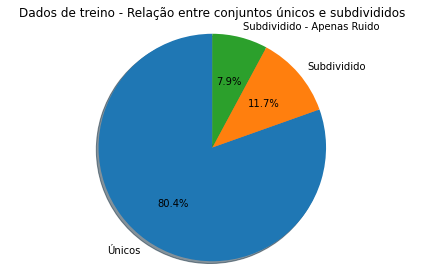

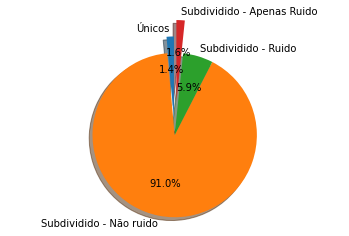

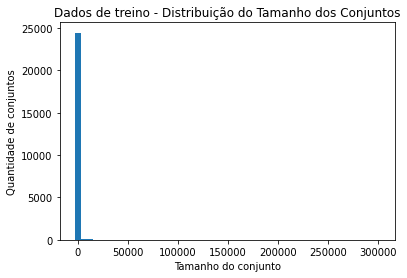

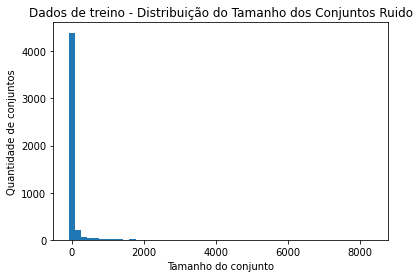

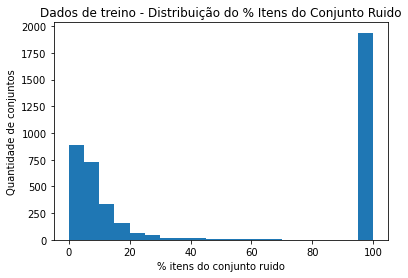

In [28]:
# dfs = [df_train, df_test, df_train_test]
# titles = ['Dados de treino', 'Dados de teste', 'Dados de treino + teste']
dfs = [df_train]
titles = ['Dados de treino']

for df,title in zip(dfs, titles):
    qtd_single_cluster = 0
    qtd_divided_cluster = 0
    qtd_only_noise = 0
    qtd_most_divisions = 0
    
    qtd_elements_single_cluster = 0
    qtd_elements_divided_cluster = 0
    qtd_elements_only_noise = 0
    qtd_elements_most_divisions = 0
    qtd_elements_noise_most_divisions = 0
    
    dist_elements_all = []
    dist_elements_noise = []
    dist_percent_elements_noise = []
    
    for id, row in df.iterrows():
        
        dist_elements_all.append(int(row["qtd_all"]))
        
        if '_' in row["cluster"]:
            qtd_divided_cluster += 1
            qtd_elements_divided_cluster += int(row["qtd_all"])
            dist_elements_noise.append(int(row["qtd_noise"]))
            if (int(row["qtd_noise"])) > 0:
                dist_percent_elements_noise.append((int(row["qtd_noise"])/int(row["qtd_all"]))*100)

                
            if int(row["qtd_non_noise"]) == 0:
                qtd_only_noise += 1
                qtd_elements_only_noise += int(row["qtd_all"])
            else:
                qtd_most_divisions += 1
                qtd_elements_most_divisions += int(row["qtd_non_noise"])
                qtd_elements_noise_most_divisions += int(row["qtd_noise"])
            
        else:
            qtd_single_cluster += 1
            qtd_elements_single_cluster += int(row["qtd_all"])
            #dist_percent_elements_noise.append(0)
    
    labels = ['Únicos', 'Subdividido', 'Subdividido - Apenas Ruido']
    sizes = [qtd_single_cluster, qtd_most_divisions, qtd_only_noise]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.gca().set(title=title+' - Relação entre conjuntos únicos e subdivididos')
    plt.tight_layout()
    plt.show()
    
    labels = ['Únicos', 'Subdividido - Não ruido','Subdividido - Ruido', 'Subdividido - Apenas Ruido']
    sizes = [qtd_elements_single_cluster, qtd_elements_most_divisions, qtd_elements_noise_most_divisions,qtd_elements_only_noise]
    explode = (0.1, 0, 0, 0.2)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode,
            shadow=True, startangle=90, radius=0.5)

    #patches,texts= plt.pie(values, explode=explode,labels=labels,  startangle=90,  radius=0.5 )#pctdistance=1.1,startangle=10, labeldistance=0.8,radius=0.5)
    ax1.axis('equal')
#     plt.gca().set(title=title+' - Relação entre quantidade de elementos conjuntos únicos e subdivididos')
    plt.gca().set(title='')
    plt.show()

    plt.hist(x=dist_elements_all, bins=50, align='left')
    plt.gca().set(title=title+' - Distribuição do Tamanho dos Conjuntos', ylabel='Quantidade de conjuntos', xlabel='Tamanho do conjunto')
    plt.show()
    
    plt.hist(x=dist_elements_noise, bins=50, align='left')
    plt.gca().set(title=title+' - Distribuição do Tamanho dos Conjuntos Ruido', ylabel='Quantidade de conjuntos', xlabel='Tamanho do conjunto')
    plt.show()
    
    plt.hist(x=dist_percent_elements_noise, bins=20, align='mid')
    plt.gca().set(title=title+' - Distribuição do % Itens do Conjunto Ruido', ylabel='Quantidade de conjuntos', xlabel='% itens do conjunto ruido')
    plt.show()